In [1]:
from utils import *
from os import walk
from adjustText import adjust_text
import itertools

# minimal promoter

In [2]:
path = 'activatable promoters/ecoli/promoter/p70mut/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

plate = pd.read_csv(path+'211103-S_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
lib = [(r,c) for r in RFP['S_0'].index for c in RFP['S_0'].columns]

get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP,lbl)/get_data(X,OD,lbl)
pareto = lambda A, B: [~(np.any((A>a) & (B<b))) for a,b in zip(A,B)]

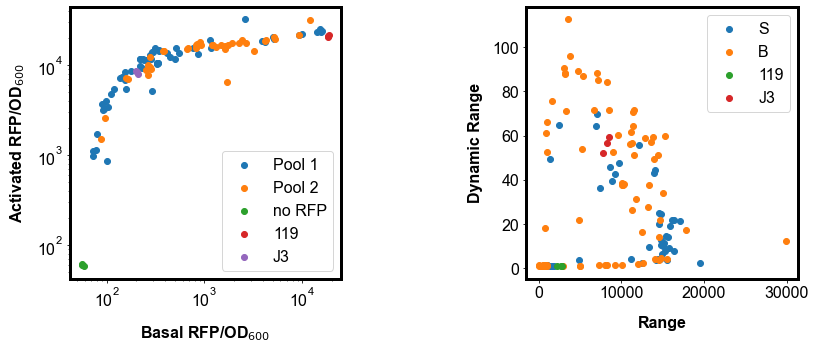

In [72]:

b0 = get_ratio(exps['J2'],'S_0')
b200 = get_ratio(exps['J2'],'S_200')

max0 = get_ratio(exps['119'],'S_0')
max200 = get_ratio(exps['119'],'S_200')

J30 = get_ratio(exps['J3'],'S_0')
J3200 = get_ratio(exps['J3'],'S_200')

S0 = get_ratio(exps['lib'],'S_0')
S200 = get_ratio(exps['lib'],'S_200')
B200 = get_ratio(lib,'B_200')
B0 = get_ratio(lib,'B_0')

R = lambda B,A: (A-b200.mean()) - (B-b0.mean())
DR = lambda B,A: (A-b200.mean()) / (B-b0.mean())
cutoff = 1.5

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(B0[DR(B0,B200)>cutoff],B200[DR(B0,B200)>cutoff])
plt.scatter(S0[DR(S0,S200)>cutoff],S200[DR(S0,S200)>cutoff])
plt.scatter(b0,b200)
plt.scatter(max0,max200)
plt.scatter(J30,J3200)

plt.legend(['Pool 1','Pool 2','no RFP','119','J3'])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Activated RFP/OD$_{600}$', labelpad = ypad)
plt.xlabel('Basal RFP/OD$_{600}$', labelpad = xpad)
plt.gca().set_aspect(1./plt.gca().get_data_ratio())


plt.subplot(122)
plt.scatter(R(S0,S200),DR(S0,S200))
plt.scatter(R(B0,B200),DR(B0,B200))
plt.scatter(R(max0,max200),DR(max0,max200))
plt.scatter(R(J30,J3200),DR(J30,J3200))
plt.legend(['S','B','119','J3'])

plt.ylabel('Dynamic Range', labelpad = ypad)
plt.xlabel('Range', labelpad = xpad)
plt.gca().set_aspect(1./plt.gca().get_data_ratio())


nB0 = (B0[DR(B0,B200)>cutoff] - b0.mean())/(J30-b0.mean()).mean()
nB200 = (B200[DR(B0,B200)>cutoff] - b200.mean())/(J3200-b200.mean()).mean()
nS0 = (S0[DR(S0,S200)>cutoff] - b0.mean())/(J30-b0.mean()).mean()
nS200 = (S200[DR(S0,S200)>cutoff] - b200.mean())/(J3200-b200.mean()).mean()

In [79]:
path = 'activatable promoters/ecoli/promoter/pAP8-off/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 45, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 45, index_col = (13,0)).loc['RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

plate = pd.read_csv(path+'211111-plate_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
lib = [(r,c) for r in RFP['210_0'].index for c in RFP['210_0'].columns]

get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP,lbl)/get_data(X,OD,lbl)
pareto = lambda A, B: [~(np.any((A>a) & (B<b))) for a,b in zip(A,B)]

b0 = get_ratio(exps['control'],'211_0')
b200 = get_ratio(exps['control'],'211_200')

J30 = get_ratio(exps['control'],'210_0')-b0.mean()
J3200 = get_ratio(exps['control'],'210_200')-b200.mean()


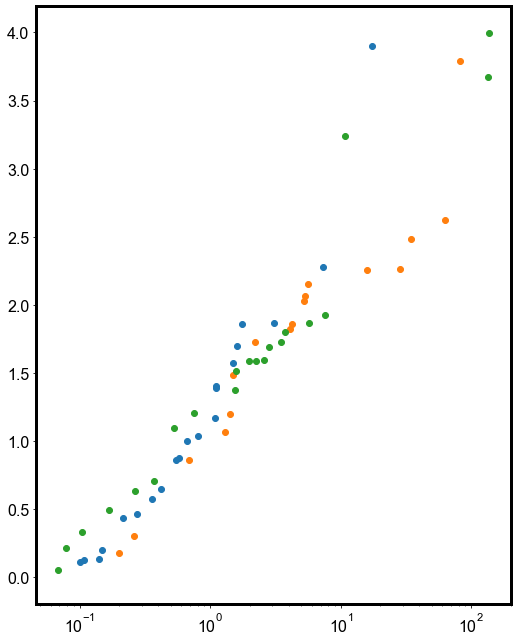

In [106]:
nP0 = (get_ratio(lib,'J3pAP8_0')-b0.mean())/J30.mean()
nP200 = (get_ratio(lib,'J3pAP8_200')-b200.mean())/J3200.mean()
pB = pareto(nB200,nB0)
pS = pareto(nS200,nS0)
pP = pareto(nP200,nP0)

plt.scatter(nB0[pB],nB200[pB])
plt.scatter(nS0[pS],nS200[pS])
plt.scatter(nP0[pP],nP200[pP])

plt.xscale('log')
plt.yscale('linear')

In [23]:
pareto = lambda A, B: [~(np.any((A>a) & (B<b))) for a,b in zip(A,B)]

In [241]:
basal = nB0
activated = nB200

activated = activated[pB]
basal = basal[pB]

FC = activated / basal

from scipy.optimize import curve_fit, minimize
def myHill(basal, R2, R1, K, beta):
    return R2/R1*(beta*basal+R1)/(K*(beta*basal)**2 + R2)

def mylog(basal,a,b):
    return a*np.log(basal)+b

def cost(args,f,x,y):
    return np.nansum((f(x,*args)-y)**2,axis=0)

# def Hill_ratio(basal,a,b,c,d):
#     return (a*basal+c)/(b*basal**2+d)
# #     ks = kfun(basal,c,z)
# #     return (1/a)*(L**(na-nb))*(b*basal + L**nb)/(b*basal*ks+L**na)

# def Hill_ratio_2(basal,a,b,L,c,z):
#     C = kfun(basal,c,z)
#     return (1/a)*(b*basal + L)/(C*b*basal+L)

# def kfun(basal, a, b):
#     return a*basal+b

# def Hill_ratio_2s(basal,z):
#     A = z[:,1][:,np.newaxis]@basal + z[:,3][:,np.newaxis]
#     B = z[:,2][:,np.newaxis]*z[:,1][:,np.newaxis]@basal + z[:,3][:,np.newaxis]
#     return 1/z[:,0][:,np.newaxis] * A/B

# def cost_s(args,f,x,y):
#     return np.nansum((f(x,args)-y)**2,axis=1)

# def cost_s2(args,f,x,y):
#     return np.nansum(  [(f(x,*args[i,:])-y)**2 for i in range(args.shape[0])],axis=1)

In [384]:
bootN = 50
params = []
pm, ps = [], []
#bounds = ([0,0,0,0,-np.inf,-np.inf,-np.inf],[np.inf]*7)
all0 = np.array([*nB0,*nS0,*nP0])
all200 = np.array([*nB200,*nS200,*nP200])

for basal, act in zip([nB0, nS0, nP0,all0],[nB200, nS200, nP200,all200]):
    params.append(np.empty(2))
    for n in range(bootN):
#         boot = np.random.choice(np.arange(len(basal)), len(basal))
#         actb = act[boot]
#         basalb = basal[boot]
        
        best = pareto(act,basal)
        FC = act/basal
        best_basal = basal[best]
        best_act = act[best]
        best_FC = best_act/best_basal

        fit = curve_fit(mylog, best_basal[best_basal>0], best_act[best_basal>0], maxfev=90000)
        params[-1] = np.vstack((params[-1],fit[0]))
        
    pm.append(params[-1].mean(axis = 0))
    ps.append(params[-1].std(axis = 0))

C:\Users\Diego Alba\.conda\envs\txtl-sim\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 1.0, 'Minimal Promoter libraries\nform same Pareto front')

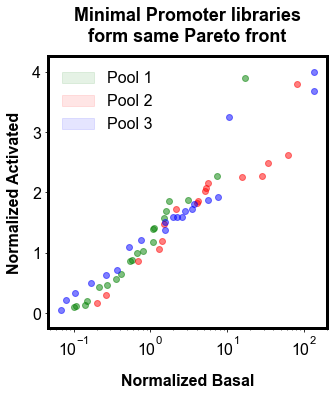

In [385]:
plt.figure(figsize = (5,5))
for k,(basal, act, c,l) in enumerate(zip([nB0, nS0, nP0],[nB200, nS200, nP200],['g','r','b'],['Pool 1','Pool 2','Pool 3'])):
    best = pareto(act,basal)
    FC = act/basal
    best_basal = basal[best]
    best_act = act[best]
    best_FC = best_act/best_basal
    
    plt.scatter(best_basal, best_act, color = c, alpha = 0.5)
    #plt.scatter(basal, FC, marker='.', alpha = 0.25)
    basal_hat = np.linspace(basal.min()/3,basal.max()*2, 5000)
    plt.fill_between(basal_hat, mylog(basal_hat,*(pm[k]+ps[k])),mylog(basal_hat,*(pm[k]-ps[k])), color = c, alpha = 0.1, label = l)

k=-1
plt.fill_between(basal_hat, mylog(basal_hat,*(pm[k]+ps[k])),mylog(basal_hat,*(pm[k]-ps[k])), color = 'k', alpha = 0.15)
plt.legend(frameon = False)
plt.ylim(-.25,4.25)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Normalized Basal', labelpad = xpad)
plt.ylabel('Normalized Activated', labelpad = ypad)
plt.title('Minimal Promoter libraries\nform same Pareto front', pad = xpad, fontsize = 18)

In [372]:
pval = 0.5
a = -1
for b in range(3):
    print(stats.ttest_ind_from_stats(pm[a][0],ps[a][0],bootN,pm[b][0],ps[a][0],bootN, equal_var = False).pvalue)
    print(stats.ttest_ind_from_stats(pm[a][1],ps[a][1],bootN,pm[b][1],ps[a][1],bootN, equal_var = False).pvalue)

1.6401784959542264e-73
8.687988025632071e-48
2.718223742242823e-64
3.564770158458859e-96
1.3694375810879714e-57
1.3694375810880102e-57


In [373]:
pm

[array([0.63964545, 1.32252662]),
 array([0.47865565, 1.09186305]),
 array([0.48969211, 1.29348848]),
 array([0.55008232, 1.42315693])]

In [374]:
ps

[array([0.07870804, 0.17491714]),
 array([0.0227674 , 0.03262075]),
 array([0.00156079, 0.02851414]),
 array([0.00854047, 0.01833789])]

In [144]:
import pyswarms as ps
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9}
bounds = (np.array([0,]*4),np.array([1e5,]*4))
optimizer = ps.single.GlobalBestPSO(n_particles=5000, dimensions=4, options=options)
optimizer.optimize(cost_s, f = Hill_ratio_2s, x = basal[:,np.newaxis].T, y = FC[:,np.newaxis].T, iters = 1000)

2021-11-15 16:18:36,860 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|1000/1000, best_cost=6.72
2021-11-15 16:18:53,155 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.724993699227416, best pos: [ 7.37753739e-01 -3.09967138e-02 -7.08320573e+01  5.37042404e+00]


(6.724993699227416,
 array([ 7.37753739e-01, -3.09967138e-02, -7.08320573e+01,  5.37042404e+00]))

In [98]:
bounds = (*((0,None),)*3,*((None, None),)*2)
minimize(cost, [2,2,2,2,2], args = (Hill_ratio_2, basal, FC), method='Nelder-Mead', bounds = bounds, tol = 1e-10, options = {'maxiter':100000})

C:\Users\Diego Alba\.conda\envs\txtl-sim\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


 final_simplex: (array([[0.68747748, 0.        , 0.        , 5.03103416, 0.53091515],
       [0.68747748, 0.        , 0.        , 5.03103416, 0.53091515],
       [0.68747748, 0.        , 0.        , 5.03103416, 0.53091515],
       [0.68747748, 0.        , 0.        , 5.03103416, 0.53091515],
       [0.68747748, 0.        , 0.        , 5.03103416, 0.53091515],
       [0.68747748, 0.        , 0.        , 5.03103416, 0.53091515]]), array([0., 0., 0., 0., 0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 978
           nit: 518
        status: 0
       success: True
             x: array([0.68747748, 0.        , 0.        , 5.03103416, 0.53091515])

In [101]:
bounds = ([0,0,0,0,-np.inf,-np.inf,-np.inf],[np.inf]*7)
fit = curve_fit(myHill, basal, FC, maxfev=90000)

bounds_2 = ([0,0,0,-np.inf,-np.inf],[np.inf]*5)
fit_2 = curve_fit(Hill_ratio_2, basal, FC, maxfev=90000)

log_fit = curve_fit(mylog, basal, activated)


In [102]:
fit

(array([1.07053318, 0.57320827, 0.81875054, 1.50912567]),
 array([[-4.28215959e+13,  5.89087413e+12, -4.94828361e+13,
          1.55095210e+13],
        [ 9.66928199e+12,  1.38864835e+12,  3.41137809e+12,
          3.65604034e+12],
        [-6.02698801e+13,  5.29159057e+11, -4.74853601e+13,
          1.39317111e+12],
        [ 2.54573315e+13,  3.65604025e+12,  8.98149160e+12,
          9.62564110e+12]]))

In [105]:
basal_hat

array([ 0.10004525,  1.10004525,  2.10004525,  3.10004525,  4.10004525,
        5.10004525,  6.10004525,  7.10004525,  8.10004525,  9.10004525,
       10.10004525, 11.10004525, 12.10004525, 13.10004525, 14.10004525,
       15.10004525, 16.10004525, 17.10004525])

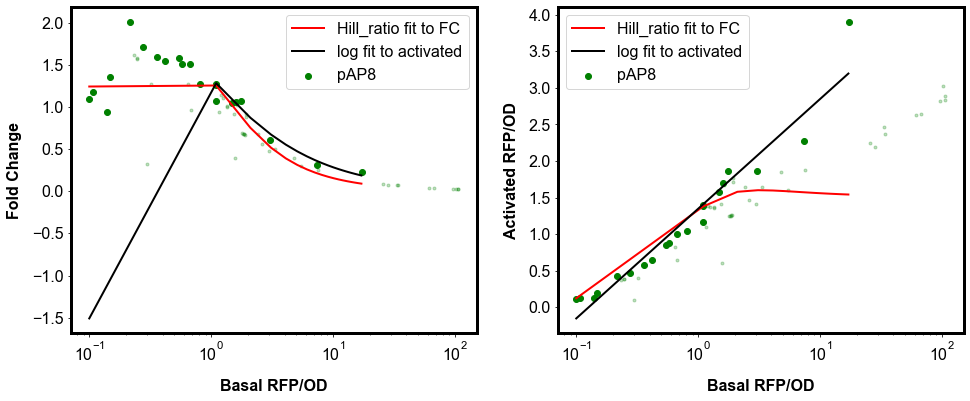

In [104]:
plt.figure(figsize=(16,6))
basal_hat = np.arange(basal.min(),basal.max())

plt.subplot(1,2,2)
plt.scatter(nB0, nB200 ,color = 'g',marker='.', alpha = 0.25)

plt.scatter(basal, basal*FC, label = 'pAP8', color = 'g')
plt.plot(basal_hat, basal_hat*myHill(basal_hat,*fit[0]),'r', label = 'Hill_ratio fit to FC')
plt.plot(basal_hat, basal_hat*mylog(basal_hat,*log_fit[0])/basal_hat,'k', label = 'log fit to activated')

plt.xscale('log')
#plt.yscale('log')

plt.ylabel('Activated RFP/OD', labelpad = ypad)
plt.xlabel('Basal RFP/OD', labelpad = xpad)
plt.legend()

plt.subplot(1,2,1)
plt.scatter(nB0, nB200/nB0,color = 'g',marker='.', alpha = 0.25)

plt.scatter(basal, FC, label = 'pAP8', color = 'g')
plt.plot(basal_hat, myHill(basal_hat,*fit[0]),'r', label = 'Hill_ratio fit to FC')

plt.plot(basal_hat, mylog(basal_hat,*log_fit[0])/basal_hat,'k', label = 'log fit to activated')

plt.xscale('log')
#plt.xlim([1e0,1e4])

plt.ylabel('Fold Change', labelpad = ypad)
plt.xlabel('Basal RFP/OD', labelpad = xpad)
plt.legend()

# UP element

In [3]:
UPpath = 'activatable promoters/ecoli/UP/'
(_,_,filenames) = list(walk(UPpath))[0]

In [4]:
read_OD = lambda f: pd.read_csv(UPpath+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(UPpath+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

In [5]:
plate = pd.read_csv(UPpath+'210709-control_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
lib = [(r,c) for r in RFP['control_0'].index for c in RFP['control_0'].columns]
libs = ['61','63','62','65','64','66']
lib_name = ['Strong','Reasonable','Random','Weak','Broken','Consensous']

In [6]:
get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_all_data = lambda df, lbl: np.array([*get_data(lib,df,lbl), *get_data(exps[lbl[:2]],df,'control'+lbl[2:])])

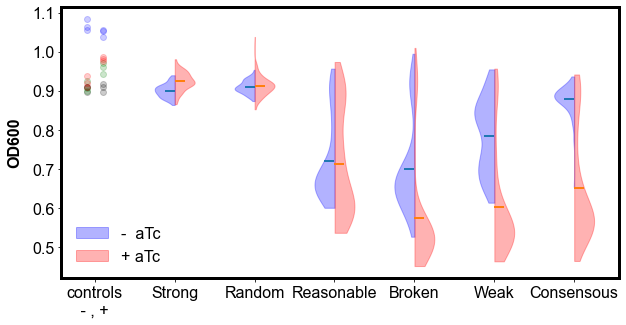

In [14]:
plt.figure(figsize=(10,5))
v1 = plt.violinplot([get_all_data(OD,l+'_0') for l in libs], showextrema=False, showmeans = True)
for k in range(0,len(libs)): v1['cmeans'].get_paths()[k].vertices[1,0] = k+1
v1['cmeans'].set_linewidth(2)

for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('b')
    
v2 = plt.violinplot([get_all_data(OD,l+'_200') for l in libs], showextrema=False, showmeans = True)
#plt.yscale('log')
for k in range(0,len(libs)): v2['cmeans'].get_paths()[k].vertices[0,0] = k+1
v2['cmeans'].set_linewidth(2)


for b in v2['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    b.set_color('r')

plt.ylabel('OD600', labelpad = ypad)
plt.xticks([0,1,2,3,4,5,6],['controls\n - , + ',*lib_name])
plt.legend([v1['bodies'][0],v2['bodies'][0]], ['-  aTc', '+ aTc'], frameon = False, loc = 'lower left')

plt.scatter(3*[-0.1], get_data(exps['off'],OD,'control_0'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[-0.1], get_data(exps['J3'],OD,'control_0'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[-0.1], get_data(exps['E'],OD,'control_0'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[-0.1], get_data(exps['119'],OD,'control_0'), color = 'b', alpha = 0.2, label = 'max')


plt.scatter(3*[0.1], get_data(exps['off'],OD,'control_200'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[0.1], get_data(exps['J3'],OD,'control_200'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[0.1], get_data(exps['E'],OD,'control_200'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[0.1], get_data(exps['119'],OD,'control_200'), color = 'b', alpha = 0.2, label = 'max')

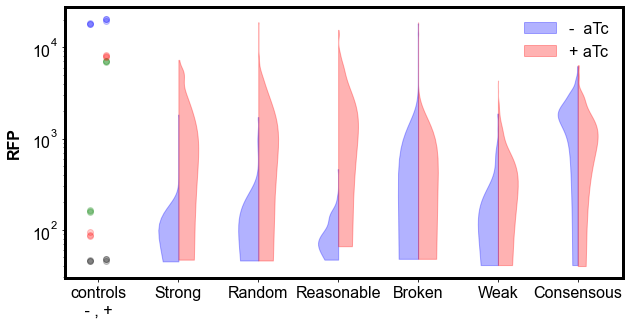

In [15]:
plt.figure(figsize=(10,5))
v1 = plt.violinplot([get_all_data(RFP,l+'_0') for l in libs], showextrema=False, showmeans = False)

for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('b')
    
v2 = plt.violinplot([get_all_data(RFP,l+'_200') for l in libs], showextrema=False, showmeans = False)

for b in v2['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    b.set_color('r')

plt.ylabel('RFP', labelpad = ypad)
plt.xticks([0,1,2,3,4,5,6],['controls\n - , + ',*lib_name])
plt.legend([v1['bodies'][0],v2['bodies'][0]], ['-  aTc', '+ aTc'], frameon = False, loc = 'upper right')
plt.yscale('log')

plt.scatter(3*[-0.1], get_data(exps['off'],RFP,'control_0'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[-0.1], get_data(exps['J3'],RFP,'control_0'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[-0.1], get_data(exps['E'],RFP,'control_0'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[-0.1], get_data(exps['119'],RFP,'control_0'), color = 'b', alpha = 0.2, label = 'max')


plt.scatter(3*[0.1], get_data(exps['off'],RFP,'control_200'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[0.1], get_data(exps['J3'],RFP,'control_200'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[0.1], get_data(exps['E'],RFP,'control_200'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[0.1], get_data(exps['119'],RFP,'control_200'), color = 'b', alpha = 0.2, label = 'max')

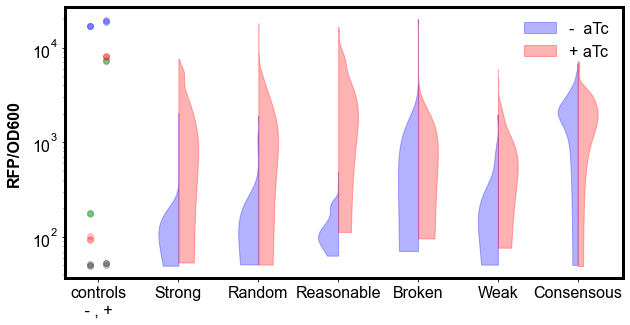

In [16]:
plt.figure(figsize=(10,5))
v1 = plt.violinplot([get_all_data(RFP,l+'_0')/get_all_data(OD,l+'_0') for l in libs], showextrema=False, showmeans = False)

for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('b')
    
v2 = plt.violinplot([get_all_data(RFP,l+'_200')/get_all_data(OD,l+'_200') for l in libs], showextrema=False, showmeans = False)

for b in v2['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    b.set_color('r')

plt.ylabel('RFP/OD600', labelpad = ypad)
plt.xticks([0,1,2,3,4,5,6],['controls\n - , + ',*lib_name])
plt.legend([v1['bodies'][0],v2['bodies'][0]], ['-  aTc', '+ aTc'], frameon = False, loc = 'upper right')
plt.yscale('log')

plt.scatter(3*[-0.1], get_data(exps['off'],RFP,'control_0')/get_data(exps['off'],OD,'control_0'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[-0.1], get_data(exps['J3'],RFP,'control_0')/get_data(exps['J3'],OD,'control_0'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[-0.1], get_data(exps['E'],RFP,'control_0')/get_data(exps['E'],OD,'control_0'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[-0.1], get_data(exps['119'],RFP,'control_0')/get_data(exps['119'],OD,'control_0'), color = 'b', alpha = 0.2, label = 'max')


plt.scatter(3*[0.1], get_data(exps['off'],RFP,'control_200')/get_data(exps['off'],OD,'control_200'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[0.1], get_data(exps['J3'],RFP,'control_200')/get_data(exps['J3'],OD,'control_200'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[0.1], get_data(exps['E'],RFP,'control_200')/get_data(exps['E'],OD,'control_200'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[0.1], get_data(exps['119'],RFP,'control_200')/get_data(exps['119'],OD,'control_200'), color = 'b', alpha = 0.2, label = 'max')

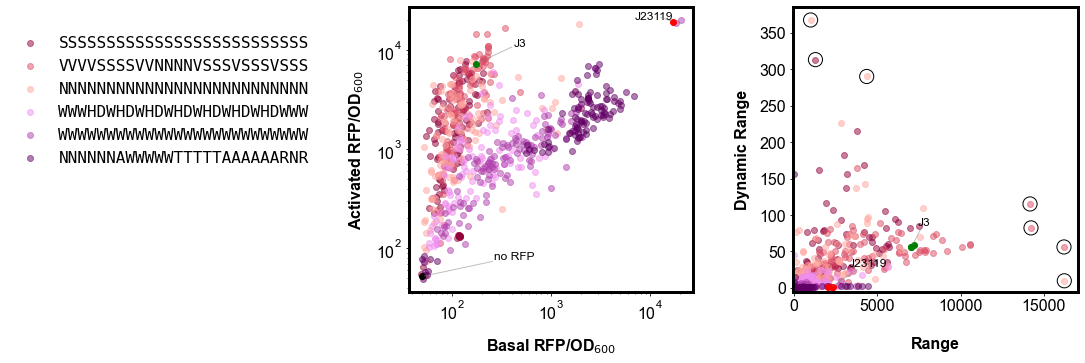

In [217]:
b = 0#np.mean(get_data(exps['off'],RFP,'control_0')/get_data(exps['off'],OD,'control_0'))
colors = ['#93003a', '#dd4c65', '#ffa59e', '#f08cef', '#b041ad', '#630065']

plt.figure(figsize = (12,36))

plt.subplot(121)
for l, lbl,c in zip(libs,lib_name,colors):
    plt.scatter(get_all_data(RFP,l+'_0')/get_all_data(OD,l+'_0')-b,get_all_data(RFP,l+'_200')/get_all_data(OD,l+'_200')-b,label = lbl, alpha = 0.5, color = c)

colors = ['black','green','#dd4c65','red']
alpha = [1,1,0.5,1]
texts = []
for c,cc,a,t in zip(['off','J3','E','119'],colors,alpha,['no RFP','J3','','J23119']):
    l= 'control'
    basal = np.mean(get_data(exps[c], RFP,l+'_0')/get_data(exps[c], OD,l+'_0'))-b
    activated = np.mean(get_data(exps[c],RFP,l+'_200')/get_data(exps[c], OD,l+'_200'))-b
    plt.scatter(basal,activated, color = cc,alpha = a)
    if c != 'E':
        texts.append(plt.text(basal, activated, t, ha='center', va='center',size = 12))
        
legend = ['SSSSSSSSSSSSSSSSSSSSSSSSSS',
      'VVVVSSSSVVNNNNVSSSVSSSVSSS',
      'NNNNNNNNNNNNNNNNNNNNNNNNNN',
      'WWWHDWHDWHDWHDWHDWHDWHDWWW',
      'WWWWWWWWWWWWWWWWWWWWWWWWWW',
      'NNNNNNAWWWWWTTTTTAAAAAARNR']
    
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Activated RFP/OD$_{600}$', labelpad = ypad)
plt.xlabel('Basal RFP/OD$_{600}$', labelpad = xpad)
plt.ylim(plt.gca().get_xlim())
plt.gca().set_aspect(1./plt.gca().get_data_ratio())
plt.xlim(plt.gca().get_xlim())

#lim = 1e5
#plt.plot([0,lim],[0,lim],'k-', alpha = 0.1)
#plt.plot([0,lim],[0,lim*10], 'k-', alpha = 0.1)
#plt.plot([0,lim],[0,lim*100], 'k-', alpha = 0.1)

adjust_text(texts, force_points = (200,20), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.5))



plt.subplot(122)
b=get_data(exps['off'], RFP,'control_0')/get_data(exps['off'], OD,'control_0')
c = 'J3'
offf = get_data(exps[c], RFP,'control_0')/get_data(exps[c], OD,'control_0')-b.mean()
onn = get_data(exps[c],RFP,'control_200')/get_data(exps[c], OD,'control_200')-b.mean()
cR = onn-offf
cDR = onn/offf

c = '119'
offf = get_data(exps[c], RFP,'control_0')/get_data(exps[c], OD,'control_0')-b.mean()
onn = get_data(exps[c],RFP,'control_200')/get_data(exps[c], OD,'control_200')-b.mean()
mR = onn-offf
mDR = onn/offf

pareto2 = lambda A, B: [~(np.any((A>a) & (B>b))) for a,b in zip(A,B)]
colors = ['#93003a', '#dd4c65', '#ffa59e', '#f08cef', '#b041ad', '#630065']

for l, lbl,c in zip(libs,lib_name,colors):
    basal = get_all_data(RFP,l+'_0')/get_all_data(OD,l+'_0')-np.mean(get_data(exps['off'],RFP,'control_0')/get_data(exps['off'],OD,'control_0'))
    activated = get_all_data(RFP,l+'_200')/get_all_data(OD,l+'_200')-np.mean(get_data(exps['off'],RFP,'control_200')/get_data(exps['off'],OD,'control_200'))
    plt.scatter(activated-basal,activated/basal,label = lbl, alpha = 0.5, color = c)
    
l = plt.legend(legend, frameon=False, bbox_to_anchor=(-1.65, .95), prop = font_manager.FontProperties(family='monospace'))

plt.scatter(R[pareto2(DR,R)],DR[pareto2(DR,R)], color = 'k', alpha = 1, s = 200,facecolors='none')
plt.scatter(cR,cDR, color = 'g', alpha = 1)
plt.scatter(mR,mDR, color = 'r', alpha = 1)
plt.xlabel('Range',labelpad = 1.5*xpad)
plt.ylabel('Dynamic Range',labelpad = ypad)
plt.xlim((-50, 17060.76544007391))
plt.ylim((-5, 385.92886691264357))

plt.gca().set_aspect(1./plt.gca().get_data_ratio())

texts = []
texts.append(plt.text(cR.mean(), cDR.mean(), 'J3', ha='center', va='center',size = 12))
texts.append(plt.text(mR.mean(), mDR.mean(), 'J23119', ha='center', va='center',size = 12))
adjust_text(texts, force_points = (20,20), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None)


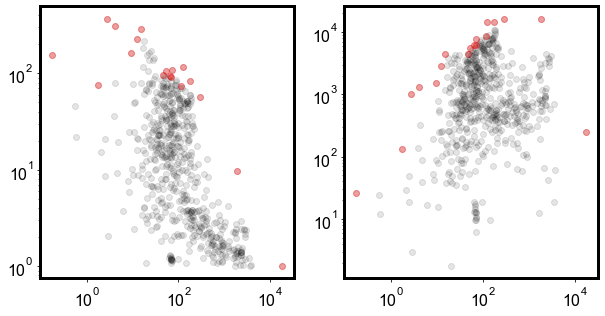

In [108]:
plt.figure(figsize = (10,5))
plt.subplot(121)
B = np.array([])
A = np.array([])
for l, lbl in zip(libs,lib_name):
    B = np.append(B,get_all_data(RFP,l+'_0')/get_all_data(OD,l+'_0')-np.mean(get_data(exps['off'],RFP,'control_0')/get_data(exps['off'],OD,'control_0')))
    A = np.append(A,get_all_data(RFP,l+'_200')/get_all_data(OD,l+'_200')-np.mean(get_data(exps['off'],RFP,'control_200')/get_data(exps['off'],OD,'control_200')))

nonneg = np.logical_and(np.logical_and((A>0), (A>B)),(B>0))
A = A[nonneg]
B = B[nonneg]

DR = A/B
R = A-B
plt.subplot(121)
plt.scatter(B, DR, label = lbl, alpha = 0.1, color = 'k')
plt.scatter(B[pareto(A,B)], DR[pareto(A,B)], label = lbl, alpha = 0.3, color = 'r')
#plt.scatter(B[pareto(DR,B)], DR[pareto(DR,B)], label = lbl, alpha = 0.3, color = 'r')

plt.xscale('log')
plt.yscale('log')

plt.subplot(122)
plt.scatter(B, R, label = lbl, alpha = 0.1, color = 'k')
plt.scatter(B[pareto(A,B)], R[pareto(A,B)], label = lbl, alpha = 0.3, color = 'r')
#plt.scatter(B[pareto(R,B)], R[pareto(R,B)], label = lbl, alpha = 0.3, color = 'g')

plt.xscale('log')
plt.yscale('log')


Check if growth defect actually had an impact.

In [49]:
ods_0 = [get_all_data(OD,l+'_0') for l in libs]
rfps_0 = [get_all_data(RFP,l+'_0') for l in libs]

ods_200 = [get_all_data(OD,l+'_200') for l in libs]
rfps_200 = [get_all_data(RFP,l+'_200') for l in libs]

In [76]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2, alpha):
    from numpy import sqrt, abs, round
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - stats.norm.cdf(abs(z))) #two-tailed
    return round(z, 3), round(pval, 4), pval > alpha, n1, n2 # p > a, keep null

def twoSampT(X,Y,var,alpha):
    t,pval = stats.ttest_ind(X,Y, equal_var = var)
    return round(t, 3), round(pval, 4), pval > alpha

alpha = 0.05

In [323]:
od_thresh = lambda od: 0.85 #np.mean(od)
good = lambda od,rfp: [r[o >= od_thresh(od)]/o[o >= od_thresh(od)] for o,r in zip(od, rfp)]
bad = lambda od,rfp: [r[o < od_thresh(od)]/o[o < od_thresh(od)] for o,r in zip(od, rfp)]

(-0.5, 6.5)

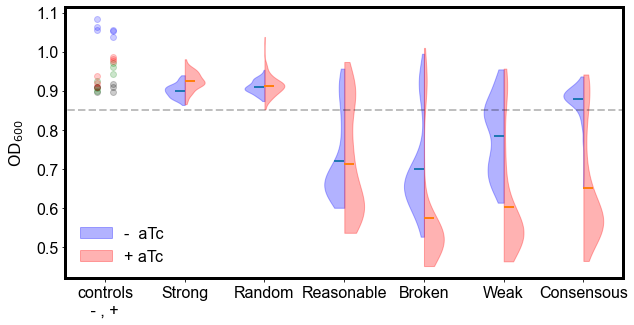

In [333]:
plt.figure(figsize=(10,5))
v1 = plt.violinplot([get_all_data(OD,l+'_0') for l in libs], showextrema=False, showmeans = True)
for k in range(0,len(libs)): v1['cmeans'].get_paths()[k].vertices[1,0] = k+1
v1['cmeans'].set_linewidth(2)

for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('b')
    
v2 = plt.violinplot([get_all_data(OD,l+'_200') for l in libs], showextrema=False, showmeans = True)
#plt.yscale('log')
for k in range(0,len(libs)): v2['cmeans'].get_paths()[k].vertices[0,0] = k+1
v2['cmeans'].set_linewidth(2)


for b in v2['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    b.set_color('r')

plt.ylabel('$\mathrm{OD_{600}}$', labelpad = ypad)
plt.xticks([0,1,2,3,4,5,6],['controls\n - , + ',*lib_name])
plt.legend([v1['bodies'][0],v2['bodies'][0]], ['-  aTc', '+ aTc'], frameon = False, loc = 'lower left')

plt.scatter(3*[-0.1], get_data(exps['off'],OD,'control_0'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[-0.1], get_data(exps['J3'],OD,'control_0'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[-0.1], get_data(exps['E'],OD,'control_0'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[-0.1], get_data(exps['119'],OD,'control_0'), color = 'b', alpha = 0.2, label = 'max')


plt.scatter(3*[0.1], get_data(exps['off'],OD,'control_200'), color = 'k', alpha = 0.2, label = 'off')
plt.scatter(3*[0.1], get_data(exps['J3'],OD,'control_200'), color = 'g', alpha = 0.2, label = 'J3')
plt.scatter(3*[0.1], get_data(exps['E'],OD,'control_200'), color = 'r', alpha = 0.2, label = 'E')
plt.scatter(3*[0.1], get_data(exps['119'],OD,'control_200'), color = 'b', alpha = 0.2, label = 'max')

plt.plot([-1,8],[0.85,0.85],'k--',alpha = 0.25)
plt.xlim([-0.5,6.5])

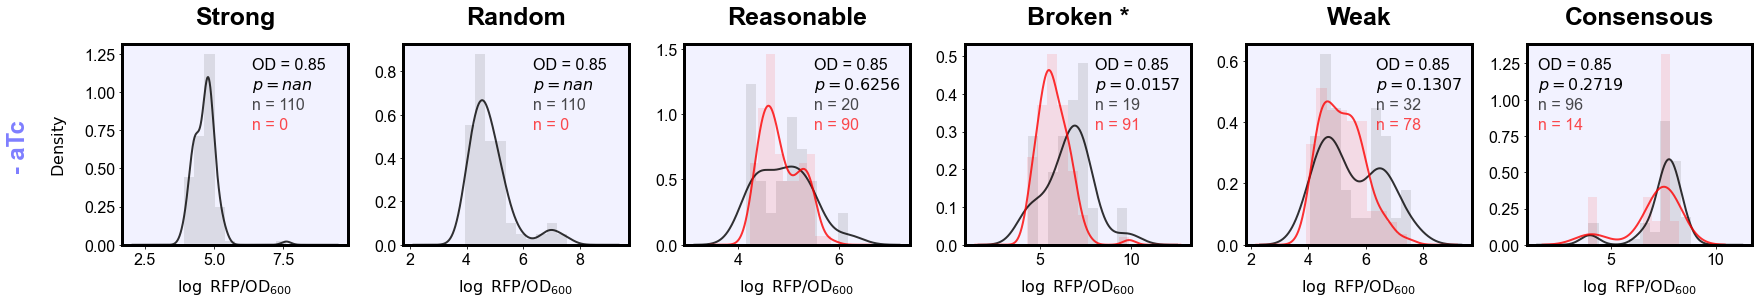

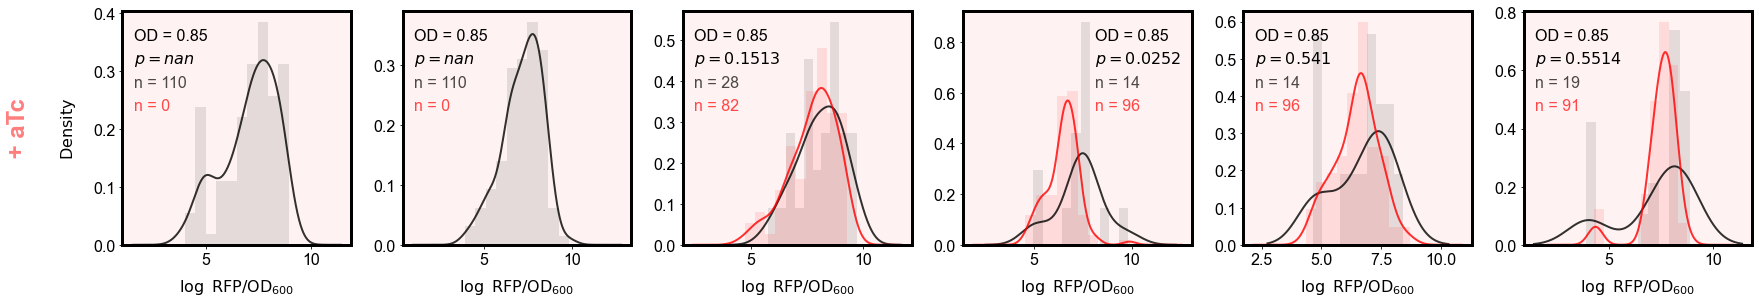

In [347]:
plt.figure(figsize = (24,4.5))
locx = [0.575,0.575,0.575,0.575,0.575,0.05]
for k,(g,b) in enumerate(zip(good(ods_0,rfps_0), bad(ods_0,rfps_0))):
    plt.subplot(1,6,k+1)
    if len(g) > 0: pd.Series(np.log(g)).plot(kind = 'kde', color = 'k', alpha = 0.8)
    if len(b) > 0: pd.Series(np.log(b)).plot(kind = 'kde', color = 'r', alpha = 0.8)
    if len(g) > 0: pd.Series(np.log(g)).plot(kind = 'hist', color = 'k', alpha = 0.1, **{'density':True})
    if len(b) > 0: pd.Series(np.log(b)).plot(kind = 'hist', color = 'r', alpha = 0.1, **{'density':True})
    plt.xlabel('$\mathrm{log\/\/\/RFP/OD_{600}}$', labelpad = 10)
    if k == 0: plt.ylabel('$\mathrm{Density}$', labelpad = 15)
    if k > 0: plt.ylabel('')
    plt.text(locx[k],0.675,'n = {}'.format(len(g)), color = 'k', alpha = 0.7, transform=plt.gca().transAxes)
    plt.text(locx[k],0.575,'n = {}'.format(len(b)), color = 'r', alpha = 0.7, transform=plt.gca().transAxes)
    plt.text(locx[k],0.875,'OD = {}'.format(np.round(od_thresh(ods_0[k]),3)), transform=plt.gca().transAxes)
    pval = twoSampT(np.log(g),np.log(b),False,alpha)[1]
    plt.text(locx[k],0.775,'$p = {}$'.format(pval), transform=plt.gca().transAxes)
    plt.title(lib_name[k], pad = 20)
    if pval < alpha: plt.title(lib_name[k]+' *', pad = 20)

    plt.gca().patch.set_facecolor('b')
    plt.gca().patch.set_alpha(0.05)

plt.figtext(-0.02,0.425,' - aTc',rotation = 90, size = 24, color = 'b', alpha = 0.5, weight = 'bold')
plt.tight_layout()

plt.figure(figsize = (24,4.5))
locx = [0.05,0.05,0.05,0.575,0.05,0.05]
for k,(g,b) in enumerate(zip(good(ods_200,rfps_200), bad(ods_200,rfps_200))):
    plt.subplot(1,6,k+1)
    if len(g) > 0: pd.Series(np.log(g)).plot(kind = 'kde', color = 'k', alpha = 0.8)
    if len(b) > 0: pd.Series(np.log(b)).plot(kind = 'kde', color = 'r', alpha = 0.8)
    if len(g) > 0: pd.Series(np.log(g)).plot(kind = 'hist', color = 'k', alpha = 0.1, **{'density':True})
    if len(b) > 0: pd.Series(np.log(b)).plot(kind = 'hist', color = 'r', alpha = 0.1, **{'density':True})
        
    plt.xlabel('$\mathrm{log\/\/\/RFP/OD_{600}}$', labelpad = 10)
    if k == 0: plt.ylabel('$\mathrm{Density}$', labelpad = 15)
    if k > 0: plt.ylabel('')
    plt.text(locx[k],0.675,'n = {}'.format(len(g)), color = 'k', alpha = 0.7, transform=plt.gca().transAxes)
    plt.text(locx[k],0.575,'n = {}'.format(len(b)), color = 'r', alpha = 0.7, transform=plt.gca().transAxes)
    plt.text(locx[k],0.875,'OD = {}'.format(np.round(od_thresh(ods_200[k]),3)), transform=plt.gca().transAxes)
    pval = twoSampT(np.log(g),np.log(b),False,alpha)[1]
    plt.text(locx[k],0.775,'$p = {}$'.format(pval), transform=plt.gca().transAxes)
    
    plt.gca().patch.set_facecolor('red')
    plt.gca().patch.set_alpha(0.05)
    
plt.figtext(-0.02,0.475,' + aTc',rotation = 90, size = 24, color = 'r', alpha = 0.5, weight = 'bold')

plt.tight_layout()

Results from the quick analysis of N26 libraries data based on a OD600 threshold (here 0.85).

Question: Does "poor" growth (low OD600s) result in statistically different expression distributions (RFP/OD) ?

Approach: two-tailed t-test, null hypothesis being that the mean RFP/OD of the two subsets are the same; alpha = 0.05

Results: p-value only < 0.05 in "Broken" library (both -/+ aTc)  (i.e., even after correcting for OD, these cells have lower expression for some other reason (note x axis is log, so means are quite different)

Takeaway: probably gonna leave the experiment as is, include this analysis and say "be wary of Broken" (or include it only in supplement)

# spacers

In [236]:
Spath = 'activatable promoters/ecoli/spacer/'
(_,_,filenames) = list(walk(Spath))[0]

In [237]:
read_OD = lambda f: pd.read_csv(Spath+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(Spath+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

In [242]:
plate = pd.read_csv(Spath+'210817-C_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
lib = [(r,c) for r in RFP['Plate_S'].index for c in RFP['Plate_S'].columns]
libs = ['Plate_W','Plate_X','Plate_S', 'Plate_C']
lib_name = ['A/T only','random','G/C only']

get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_data_df = lambda X, df, lbl: ([df[lbl].loc[x] for x in X])

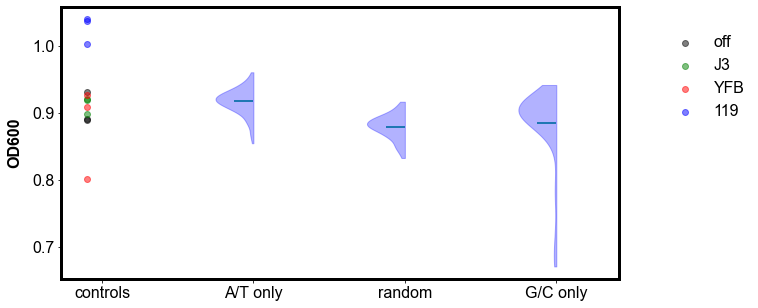

In [239]:
plt.figure(figsize=(10,5))
v1 = plt.violinplot([get_data(lib,OD,l) for l in libs[:-1]], showextrema=False, showmeans = True)
for k in range(0,len(libs[:-1])): v1['cmeans'].get_paths()[k].vertices[1,0] = k+1
v1['cmeans'].set_linewidth(2)

for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('b')
    

plt.ylabel('OD600', labelpad = ypad)
plt.xticks([0,1,2,3],['controls',*lib_name])

plt.scatter(3*[-0.1], get_data(exps['J2'],OD,'Plate_C'), color = 'k', alpha = 0.5, label = 'off')
plt.scatter(3*[-0.1], get_data(exps['J306'],OD,'Plate_C'), color = 'g', alpha = 0.5, label = 'J3')
plt.scatter(3*[-0.1], get_data(exps['YFB'],OD,'Plate_C'), color = 'r', alpha = 0.5, label = 'YFB')
plt.scatter(3*[-0.1], get_data(exps['119'],OD,'Plate_C'), color = 'b', alpha = 0.5, label = '119')

plt.legend(frameon = False, bbox_to_anchor=(1.25, .95))

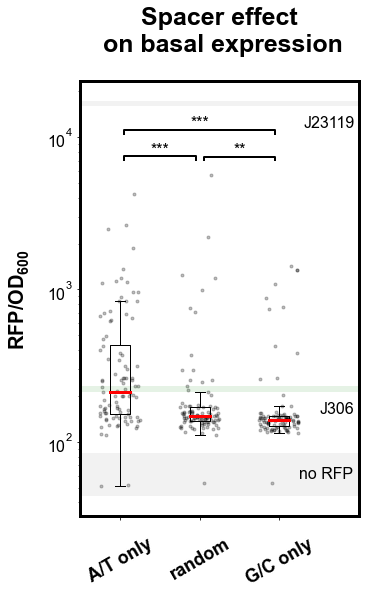

In [240]:

Y = [get_data(lib,RFP,l)/get_data(lib,OD,l) for l in libs[:-1]]
YFB = [get_data(exps['YFB'],RFP,l)/get_data(exps['YFB'],OD,l) for l in [libs[-1]]]

Y[1] = np.append(Y[1],YFB)
X = [(np.random.rand(len(y))-0.5)/2 for y in Y]

plt.figure(figsize = (5,8))
[plt.scatter(x+z,y, alpha = 0.25,marker='.', color = 'k') for x,y,z in zip(X,Y,[1,2,3])]
bp = plt.boxplot(np.array(Y,dtype=object).T,showfliers=False, widths = 0.25)

for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
    
top = [get_data(exps['119'],RFP,l)/get_data(exps['119'],OD,l) for l in [libs[-1]]]
plt.axhspan(np.mean(top)-np.std(top), np.mean(top)+np.std(top), facecolor='0.5',alpha = 0.1)
plt.text(3.3, np.mean(top)*0.7,'J23119', rotation = 0)

bot = [get_data(exps['J2'],RFP,l)/get_data(exps['J2'],OD,l) for l in [libs[-1]]]
plt.axhspan(np.mean(bot)-np.std(bot), np.mean(bot)+np.std(bot), facecolor='0.5', alpha = 0.1)
plt.text(3.25, np.mean(bot)*0.9,'no RFP', rotation = 0)

J306 = [get_data(exps['J306'],RFP,l)/get_data(exps['J306'],OD,l) for l in [libs[-1]]]
plt.axhspan(np.mean(J306)-np.std(J306), np.mean(J306)+np.std(J306), facecolor='green',alpha = 0.1)
plt.text(3.5, np.mean(J306)*0.7,'J306', rotation = 0)

plt.xticks([1,2,3],labels = lib_name, size = 18, weight = 'bold', rotation = 30)
plt.gca().xaxis.set_tick_params(pad=xpad)


xlocs = [1.05,1.95,2.05,2.95]
ylocs = [val for val in [np.max(y) for y in Y] for _ in (0, 1)]
put_pval(0, 1, stats.median_test(Y[0],Y[1])[1], xlocs, ylocs, dh = 0.15, barh = .02, maxasterix = 3)
put_pval(2, 3, stats.median_test(Y[1],Y[2])[1], xlocs, ylocs, dh = 0.075, barh = .02)
put_pval(0, 3, stats.median_test(Y[0],Y[2])[1], xlocs, ylocs, dh = 0.25, barh = .04, maxasterix =3)

plt.xlim([0.5,4])
plt.yscale('log')
plt.ylabel('$\mathregular{RFP/OD_{600}}$', labelpad = 1.5*ypad, size = 20, weight = 'bold')
plt.title('Spacer effect\n on basal expression', pad = 2*xpad)
ylim_spacers = plt.gca().get_ylim()

In [49]:
nY = [(y-np.mean(bot))/(np.mean(J306)-np.mean(bot)) for y in Y]

In [252]:
picked = [('F','8'),('H','5'),('A','9'),('G','8'),('E','2'),('F','10'),('A','12'),('G','5'),('C','9'),('F','11')]

In [258]:
og_basal = [get_data(picked,RFP,l)/get_data(picked,OD,l) for l in [libs[1]]]
og_basal = (og_basal-np.mean(bot))/(np.mean(J306)-np.mean(bot))
og_basal

array([[0.36371859, 0.36048372, 0.46313061, 0.37319057, 0.39073934,
        0.44938617, 0.4431714 , 0.42869821, 0.39817333, 0.52467202]])

spacers E

In [50]:
Spath = 'activatable promoters/ecoli/spacer_E/'
(_,_,filenames) = list(walk(Spath))[0]

read_OD = lambda f: pd.read_csv(Spath+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD_E = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(Spath+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD_E[f[:-4]].index)
RFP_E = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

#plate = pd.read_csv(Spath+'210902-control_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
# labels = pd.unique(np.concatenate(plate.values))
# exps = {}
# xlbl = []
# for l in labels:
#     if type(l) is str:
#         xlbl.append(l)
#         index = plate[plate.isin([l])].stack().index
#         exps[l] = []
#         for i in index:
#             exps[l].append((i[0], i[1]))
            
lib = [(r,c) for r in RFP_E['Plate_S'].index for c in RFP_E['Plate_S'].columns]
controls = lib[:3]
lib = lib [3:]
libs = ['Plate_W','Plate_X','Plate_S', 'control']
lib_name = ['A/T only','random','G/C only']

get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])

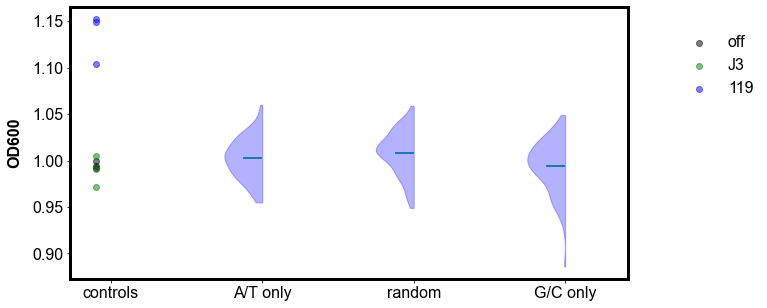

In [51]:
plt.figure(figsize=(10,5))
v1 = plt.violinplot([get_data(lib,OD_E,l) for l in libs[:-1]], showextrema=False, showmeans = True)
for k in range(0,len(libs[:-1])): v1['cmeans'].get_paths()[k].vertices[1,0] = k+1
v1['cmeans'].set_linewidth(2)

for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('b')
    

plt.ylabel('OD600', labelpad = ypad)
plt.xticks([0,1,2,3],['controls',*lib_name])

plt.scatter(3*[-0.1], get_data(controls,OD_E,'Plate_W'), color = 'k', alpha = 0.5, label = 'off')
plt.scatter(3*[-0.1], get_data(controls,OD_E,'Plate_X'), color = 'g', alpha = 0.5, label = 'J3')
plt.scatter(3*[-0.1], get_data(controls,OD_E,'Plate_S'), color = 'b', alpha = 0.5, label = '119')

plt.legend(frameon = False, bbox_to_anchor=(1.25, .95))

Text(0.5, 1.0, 'Spacer effect\n on basal expression\n (low leak UP)')

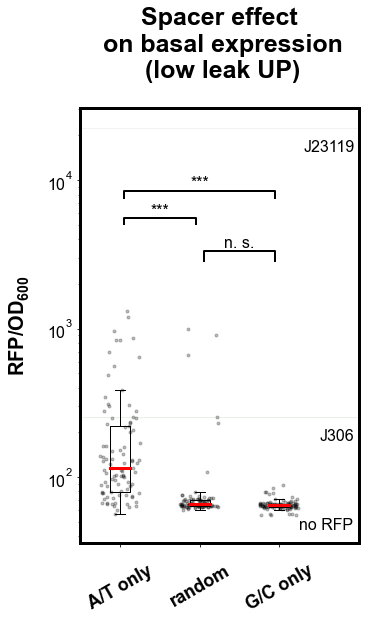

In [52]:

Y = [get_data(lib,RFP_E,l)/get_data(lib,OD_E,l) for l in libs[:-1]]
X = [(np.random.rand(len(y))-0.5)/2 for y in Y]

plt.figure(figsize = (5,8))
[plt.scatter(x+z,y, alpha = 0.25,marker='.', color = 'k') for x,y,z in zip(X,Y,[1,2,3])]
bp = plt.boxplot(np.array(Y,dtype=object).T,showfliers=False, widths = 0.25)

for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
    
top = [get_data(controls,RFP_E,l)/get_data(controls,OD_E,l) for l in ['Plate_S']]
plt.axhspan(np.mean(top)-np.std(top)*2, np.mean(top)+np.std(top)*2, facecolor='0.5',alpha = 0.1)
plt.text(3.3, np.mean(top)*0.7,'J23119', rotation = 0)

bot = [get_data(controls,RFP_E,l)/get_data(controls,OD_E,l) for l in ['Plate_W']]
plt.axhspan(np.mean(bot)-np.std(bot), np.mean(bot)+np.std(bot), facecolor='0.5', alpha = 0.1)
plt.text(3.25, np.mean(bot)*0.9,'no RFP', rotation = 0)

J306 = [get_data(controls,RFP_E,l)/get_data(controls,OD_E,l) for l in ['Plate_X']]
plt.axhspan(np.mean(J306)-np.std(J306), np.mean(J306)+np.std(J306), facecolor='green',alpha = 0.1)
plt.text(3.5, np.mean(J306)*0.7,'J306', rotation = 0)

plt.xticks([1,2,3],labels = lib_name, size = 18, weight = 'bold', rotation = 30)
plt.gca().xaxis.set_tick_params(pad=xpad)


xlocs = [1.05,1.95,2.05,2.95]
ylocs = [val for val in [np.max(y) for y in Y] for _ in (0, 1)]
put_pval(0, 1, stats.median_test(Y[0],Y[1])[1], xlocs, ylocs, dh = 0.15, barh = .02, maxasterix = 3)
put_pval(2, 3, stats.median_test(Y[1],Y[2])[1], xlocs, ylocs, dh = 0.075, barh = .02)
put_pval(0, 3, stats.median_test(Y[0],Y[2])[1], xlocs, ylocs, dh = 0.25, barh = .04, maxasterix =3)

plt.xlim([0.5,4])
#plt.ylim(ylim_spacers)
plt.yscale('log')
plt.ylabel('$\mathregular{RFP/OD_{600}}$', labelpad = 1.5*ypad, size = 20, weight = 'bold')
plt.title('Spacer effect\n on basal expression\n (low leak UP)', pad = 2*xpad)

In [53]:
nY_E = [(y-np.mean(bot))/(np.mean(J306)-np.mean(bot)) for y in Y]

Text(0, 0.5, 'Normalized Basal RFP/OD$_{600}$')

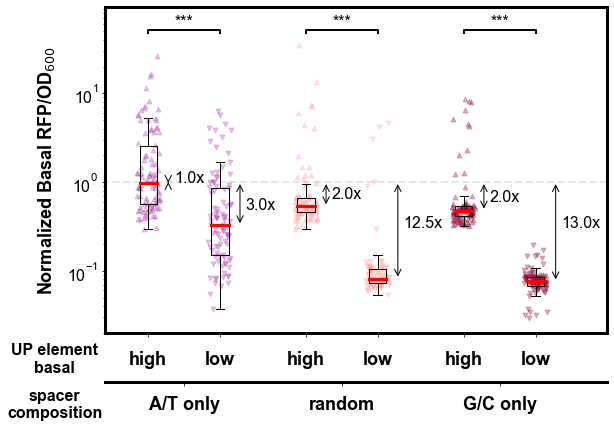

In [54]:
Y = [nY[0],nY_E[0],nY[1],nY_E[1],nY[2],nY_E[2]]
Y = [y[y>0] for y in Y]
X = [(np.random.rand(len(y))-0.5)/2.5 for y in Y]

colors = ['#b041ad', '#b041ad','#ffa59e','#ffa59e','#93003a','#93003a']
alphas = [0.3]*6
markers = ['^','v']*3

xlocs = [0,1.25,2.75,4,5.5,6.75]
plt.figure(figsize = (9,6))
[plt.scatter(x+z,y,marker=m, color = c,alpha =a, s = 24) for x,y,z,c,a,m in zip(X,Y,xlocs,colors,alphas,markers)]
bp = plt.boxplot(np.array(Y,dtype=object).T,positions = xlocs, showfliers=False, widths = 0.3)
ax = plt.gca()

medians = []
for median,c in zip(bp['medians'],colors): 
    median.set(color ='r', linewidth = 3)
    y = median.get_ydata()[0]
    x = median.get_xdata()[1]
    medians.append(median.get_ydata()[0])
    
    ax.annotate("", xy=(x+0.2, 1), xytext=(x+0.2, y),
                 arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1))
    ax.text(x+0.3,y+(1-y)/4, '{x:.{d}f}x'.format(x=np.round(2/y)/2,d=1))

ax.set_xlim([-.75,8])
plt.plot([-1,8],[1,1],'k--', alpha =0.1)
plt.ylim([0.02,95])  
plt.yscale('log')

ylocs = [19]*6
put_pval(0, 1, stats.median_test(Y[0],Y[1])[1], xlocs, ylocs, dh = 0.3, barh = .05, maxasterix = 3)
put_pval(2, 3, stats.median_test(Y[2],Y[3])[1], xlocs, ylocs, dh = 0.3, barh = .05, maxasterix =3)
put_pval(4, 5, stats.median_test(Y[4],Y[5])[1], xlocs, ylocs, dh = 0.3, barh = .05, maxasterix =3)

# Second X-axis
ax2 = ax.twiny(); ax2.set_xlim(ax.get_xlim())
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.15))

ax.tick_params(axis='x', which='major', pad=14)
ax.set_xlabel('UP element\nbasal', size = 16)
ax.xaxis.set_label_coords(-0.10, -0.03)
ax.set_xticklabels(labels = ['high','low']*3, size = 18, weight = 'bold')

ax2.tick_params(axis='x', which='major', pad=10)
ax2.set_xlabel('spacer\ncomposition', size = 16)
ax2.xaxis.set_label_coords(-0.10, -0.17)
ax2.set_xticks([(x2-x1)/2+x1 for x1,x2 in zip(xlocs[::2],xlocs[1::2])])
ax2.set_xticklabels(labels = lib_name, size = 18, weight = 'bold')

ax.set_ylabel('Normalized Basal RFP/OD$_{600}$', labelpad = ypad, size = 18, weight = 'bold')

In [234]:
from scipy.stats import bootstrap, gaussian_kde, kurtosis, norm

def kurt(x,axis):
    return np.array(kurtosis(x))

alpha = 0.05
n=9999
Z = norm.ppf(1-alpha/2)

CI = bootstrap((Y[0],),kurt,confidence_level=1-alpha, n_resamples = n).confidence_interval
(CI.high-CI.low)/2/Z*np.sqrt(n)

62.978093817387006

In [235]:
CI

ConfidenceInterval(low=15.587057144421868, high=18.05587650241721)

In [309]:
path = 'activatable promoters/ecoli/spacer_sele/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD_E = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD_E[f[:-4]].index)
RFP_E = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

plate = pd.read_csv(path+'211011-spacers.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP_E,lbl)/get_data(X,OD_E,lbl)

In [310]:
lbls = list(exps)[:15]
m0 = lambda lbl: np.array([get_ratio(exps[l],'0aTc').mean() for l in lbl])
s0 = lambda lbl: np.array([get_ratio(exps[l],'0aTc').mean() for l in lbl])
m200 = lambda lbl: np.array([get_ratio(exps[l],'200aTc').mean() for l in lbl])
s200 = lambda lbl: np.array([get_ratio(exps[l],'200aTc').mean() for l in lbl])

M = lambda m: m-m0(['J2'])
R = lambda lbl: M(m200(lbl))/M(m0(lbl))

e1 = lambda s1,s2: (s1**2+s2**2)**0.5
E1 = lambda s: e1(s,s0(['J2']))
e2 = lambda m1,m2,s1,s2: e1(s1/m1,s2/m2)
E2 = lambda lbl: e2(M(m200(lbl)),M(m0(lbl)),E1(s200(lbl)),E1(s0(lbl)))

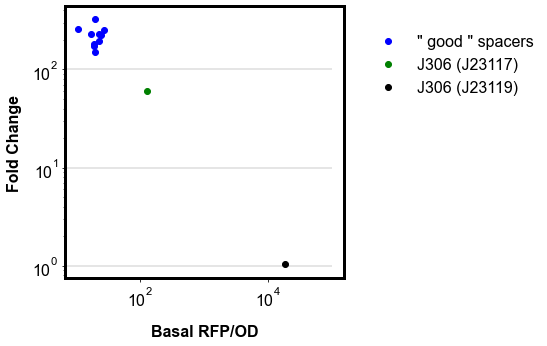

In [316]:
from adjustText import adjust_text

plt.figure(figsize = (5,5))

plt.errorbar(x=M(m0(lbls[:9])),y=R(lbls[:9]), color = 'b', label = '" good " spacers', fmt ='o')
#plt.errorbar(x=m0(lbls[9:11])-m0(['J2']),y=(m200(lbls[9:11])-m0(['J2']))/(m0(lbls[9:11])-m0(['J2'])), color = 'r', label = '" bad " spacers',fmt ='o')
plt.errorbar(x=m0(['YFB'])-m0(['J2']),y=(m200(['YFB'])-m0(['J2']))/(m0(['YFB'])-m0(['J2'])),color = 'b',fmt ='o')
plt.errorbar(x=m0(['J3'])-m0(['J2']),y=(m200(['J3'])-m0(['J2']))/(m0(['J3'])-m0(['J2'])), label = 'J306 (J23117)', color = 'g',fmt ='o')
plt.errorbar(x=m0(['119'])-m0(['J2']),y=(m200(['119'])-m0(['J2']))/(m0(['119'])-m0(['J2'])), label = 'J306 (J23119)',fmt ='o', color = 'k')

plt.legend(frameon=False, bbox_to_anchor=(1.05, .95))
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Fold Change', labelpad = ypad)
plt.xlabel('Basal RFP/OD', labelpad = xpad)
#plt.ylim(plt.gca().get_xlim())
#plt.gca().set_aspect(1./plt.gca().get_data_ratio())
#plt.xlim(plt.gca().get_xlim())

lim = 1e5
plt.plot([0,lim],2*[lim/lim ],'k-', alpha = 0.1)
plt.plot([0,lim],2*[lim*10/lim], 'k-', alpha = 0.1)
plt.plot([0,lim],2*[lim*100/lim], 'k-', alpha = 0.1)

#texts = [plt.text(m0[i]-m0[-2], (m200[i]-m0[-2])/(m0[i]-m0[-2]), lbls[i], ha='center', va='center',size = 12) for i in range(len(lbls))]
#adjust_text(texts, force_text = (3,3), force_points = (2,-2), force_objects = (0.0,0.0), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.1))


Text(0.5, 0, 'Basal RFP/OD')

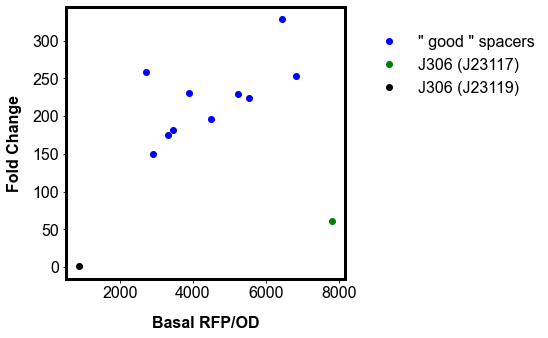

In [250]:
from adjustText import adjust_text

plt.figure(figsize = (5,5))

plt.errorbar(x=M(m200(lbls[:9]))-M(m0(lbls[:9])),y=R(lbls[:9]), color = 'b', label = '" good " spacers', fmt ='o')
plt.errorbar(x=(m200(['YFB'])-m0(['J2']))-(m0(['YFB'])-m0(['J2'])),y=(m200(['YFB'])-m0(['J2']))/(m0(['YFB'])-m0(['J2'])),color = 'b',fmt ='o')
plt.errorbar(x=(m200(['J3'])-m0(['J2']))-(m0(['J3'])-m0(['J2'])),y=(m200(['J3'])-m0(['J2']))/(m0(['J3'])-m0(['J2'])), label = 'J306 (J23117)', color = 'g',fmt ='o')
plt.errorbar(x=(m200(['119'])-m0(['J2']))-(m0(['119'])-m0(['J2'])),y=(m200(['119'])-m0(['J2']))/(m0(['119'])-m0(['J2'])), label = 'J306 (J23119)',fmt ='o', color = 'k')

plt.legend(frameon=False, bbox_to_anchor=(1.05, .95))
plt.ylabel('Fold Change', labelpad = ypad)
plt.xlabel('Basal RFP/OD', labelpad = xpad)
#plt.ylim(plt.gca().get_xlim())
#plt.gca().set_aspect(1./plt.gca().get_data_ratio())
#plt.xlim(plt.gca().get_xlim())

#texts = [plt.text(m0[i]-m0[-2], (m200[i]-m0[-2])/(m0[i]-m0[-2]), lbls[i], ha='center', va='center',size = 12) for i in range(len(lbls))]
#adjust_text(texts, force_text = (3,3), force_points = (2,-2), force_objects = (0.0,0.0), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.1))


8

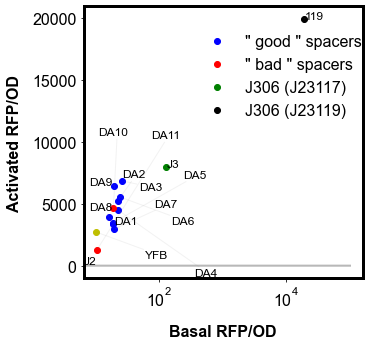

In [262]:
from adjustText import adjust_text

plt.figure(figsize = (5,5))

plt.errorbar(x=M(m0(lbls[:9])),y=M(m200(lbls[:9])), color = 'b', label = '" good " spacers', fmt ='o')
plt.errorbar(x=m0(lbls[9:11])-m0(['J2']),y=(m200(lbls[9:11])-m0(['J2'])), color = 'r', label = '" bad " spacers',fmt ='o')
plt.errorbar(x=m0(['YFB'])-m0(['J2']),y=(m200(['YFB'])-m0(['J2'])),color = 'y',fmt ='o')
plt.errorbar(x=m0(['J3'])-m0(['J2']),y=(m200(['J3'])-m0(['J2'])), label = 'J306 (J23117)', color = 'g',fmt ='o')
plt.errorbar(x=m0(['119'])-m0(['J2']),y=(m200(['119'])-m0(['J2'])), label = 'J306 (J23119)',fmt ='o', color = 'k')

plt.legend(frameon=False, bbox_to_anchor=(1.05, .95))
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Activated RFP/OD', labelpad = ypad)
plt.xlabel('Basal RFP/OD', labelpad = xpad)
#plt.ylim(plt.gca().get_xlim())
#plt.gca().set_aspect(1./plt.gca().get_data_ratio())
#plt.xlim(plt.gca().get_xlim())

lim = 1e5
plt.plot([0,lim],2*[lim/lim ],'k-', alpha = 0.1)
plt.plot([0,lim],2*[lim*10/lim], 'k-', alpha = 0.1)
plt.plot([0,lim],2*[lim*100/lim], 'k-', alpha = 0.1)

texts = [plt.text(m0([i])-m0(['J2']), (m200([i])-m0(['J2'])), i, ha='center', va='center',size = 12) for i in lbls]
adjust_text(texts, force_text = (3,3), force_points = (2,-2), force_objects = (0.0,0.0), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.1))


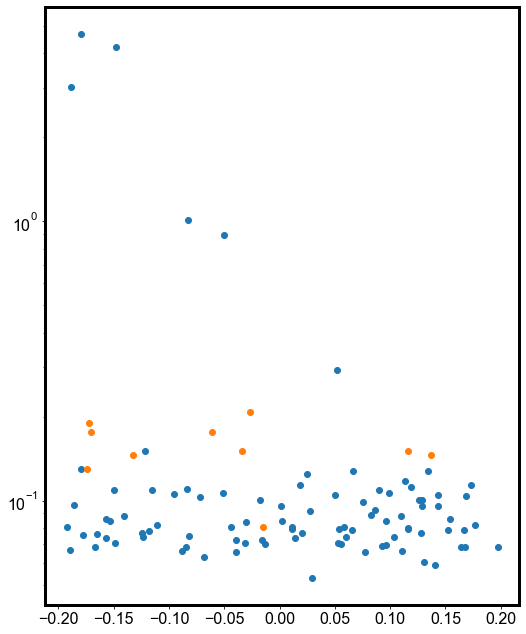

In [357]:
plt.scatter((np.random.rand(len(nY_E[1]))-0.5)/2.5,nY_E[1])
plt.scatter((np.random.rand(len(new_basal))-0.5)/2.5,new_basal)

plt.yscale('log')

Text(0.5, 0, 'Norm Basal RFP/OD')

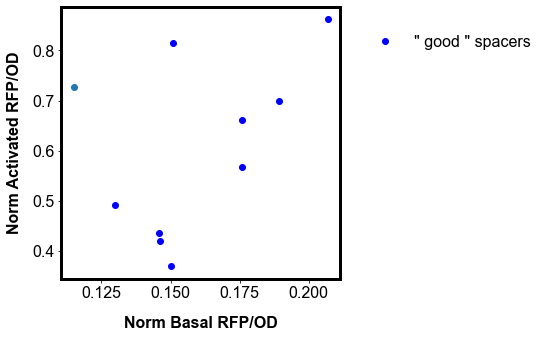

In [347]:
from adjustText import adjust_text

plt.figure(figsize = (5,5))

plt.errorbar(x=M(m0(lbls[:9]))/M(m0(['J3'])),y=M(m200(lbls[:9]))/M(m200(['J3'])), color = 'b', label = '" good " spacers', fmt ='o')
plt.scatter(0.11512,0.72754)
plt.legend(frameon=False, bbox_to_anchor=(1.05, .95))
plt.ylabel('Norm Activated RFP/OD', labelpad = ypad)
plt.xlabel('Norm Basal RFP/OD', labelpad = xpad)
#plt.ylim(plt.gca().get_xlim())
#plt.gca().set_aspect(1./plt.gca().get_data_ratio())
#plt.xlim(plt.gca().get_xlim())

#texts = [plt.text(m0[i]-m0[-2], (m200[i]-m0[-2])/(m0[i]-m0[-2]), lbls[i], ha='center', va='center',size = 12) for i in range(len(lbls))]
#adjust_text(texts, force_text = (3,3), force_points = (2,-2), force_objects = (0.0,0.0), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.1))


In [343]:
M(m200(lbls[:9]))/M(m200(['J3']))

array([0.49310021, 0.66159129, 0.8620537 , 0.5674659 , 0.43629703,
       0.6990108 , 0.36973022, 0.42076698, 0.81469035])

In [337]:
0.115128407
0.727542558


array([0.12977336, 0.17574354, 0.20683484, 0.17585728, 0.14572917,
       0.18925923, 0.15003323, 0.14617836, 0.15082748, 0.08049282])

In [272]:
new_basal = M(m0(lbls[:9]))/(m0(['J3'])-m0(['J2']))
new_basal = np.append(new_basal, (m0(['YFB'])-m0(['J2']))/(m0(['J3'])-m0(['J2'])))

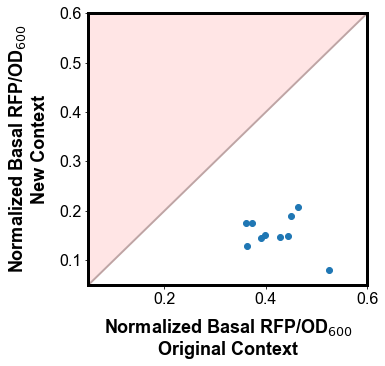

In [329]:
plt.figure(figsize = (5,5))
plt.scatter(og_basal,new_basal)
#plt.scatter(1,1)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim([0.05,0.6])
#plt.gca().set_aspect(1./plt.gca().get_data_ratio())
plt.xlim([0.05,0.6])
plt.plot([0.05,0.6],[0.05,0.6],'k', alpha = 0.25)

plt.xlabel('Normalized Basal RFP/OD$_{600}$\nOriginal Context', labelpad = ypad, size = 18, weight = 'bold')
plt.ylabel('Normalized Basal RFP/OD$_{600}$\nNew Context', labelpad = ypad, size = 18, weight = 'bold')

plt.fill([0.05,0.05,0.6], [0.05,0.6,0.6], color = 'r',alpha = 0.1)
plt.fill([0.05,0.6,0.6], [0.05,0.6,0.6], color = 'g',alpha = 0.1)

# plt.annotate("", xy=(0.425, 0.4), xytext=(0.425, 0.225),
#              arrowprops=dict(arrowstyle="<-", connectionstyle="arc3", color = 'k', lw = 1))

In [6]:
lbls = list(exps)[15:-1]
m0 = np.array([get_ratio(exps[l],'0aTc').mean() for l in lbls])
s0 = np.array([get_ratio(exps[l],'0aTc').mean() for l in lbls])

In [236]:
path = 'activatable promoters/ecoli/soxbox/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

plate = pd.read_csv(path+'211025-soxbox_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP,lbl)/get_data(X,OD,lbl)

In [237]:
sorted_lbls = np.sort([*exps.keys()])

<ipython-input-238-e29f2f967f66>:21: RuntimeWarning: invalid value encountered in double_scalars
  m.append((m200)/(m0))
<ipython-input-238-e29f2f967f66>:22: RuntimeWarning: divide by zero encountered in double_scalars
  s.append(m[-1]*np.sqrt( (s200/m200)**2 + (s0/m0)**2 ))


([<matplotlib.axis.XTick at 0x232ff7e9e80>,
 [Text(0, 0, '119_2+'),
  Text(1, 0, '119_2-'),
  Text(2, 0, 'J2_2+'),
  Text(3, 0, 'J2_2-'),
  Text(4, 0, 'J3_1+'),
  Text(5, 0, 'J3_1-'),
  Text(6, 0, 'J3_2+'),
  Text(7, 0, 'J3_2-'),
  Text(8, 0, 'anti_1+'),
  Text(9, 0, 'anti_1-'),
  Text(10, 0, 'anti_2+'),
  Text(11, 0, 'anti_2-'),
  Text(12, 0, 'opt_1+'),
  Text(13, 0, 'opt_1-'),
  Text(14, 0, 'opt_2+'),
  Text(15, 0, 'opt_2-'),
  Text(16, 0, 'soxs_1+'),
  Text(17, 0, 'soxs_1-'),
  Text(18, 0, 'soxs_2+'),
  Text(19, 0, 'soxs_2-')])

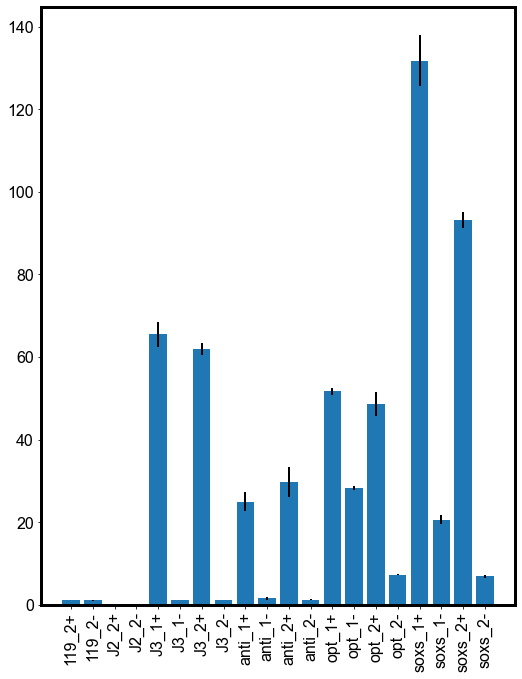

In [238]:
m = []
s = []
for l in sorted_lbls:
    if '+' in l: 
        bm200 = get_ratio(exps['J2_2+'],'200nM').mean()
        bs200 = get_ratio(exps['J2_2+'],'200nM').std()
        bm0 = get_ratio(exps['J2_2+'],'0nM').mean()
        bs0 = get_ratio(exps['J2_2+'],'0nM').std()
        
    else:
        bm200 = get_ratio(exps['J2_2-'],'200nM').mean()
        bs200 = get_ratio(exps['J2_2-'],'200nM').std()
        bm0 = get_ratio(exps['J2_2-'],'0nM').mean()
        bs0 = get_ratio(exps['J2_2-'],'0nM').std()

    m200 = get_ratio(exps[l],'200nM').mean()-bm200
    s200 = (get_ratio(exps[l],'200nM').std()**2 + bs200**2)**0.5
    m0 = get_ratio(exps[l],'0nM').mean()-bm0
    s0 = (get_ratio(exps[l],'0nM').std()**2 + bs0**2)**0.5
    
    m.append((m200)/(m0))
    s.append(m[-1]*np.sqrt( (s200/m200)**2 + (s0/m0)**2 ))
    
m = np.array(m)
s = np.array(s)

plt.bar(np.arange(len(sorted_lbls)), m, yerr = s)
plt.xticks(np.arange(len(sorted_lbls)),sorted_lbls, rotation = 90)

Text(8.2, 20, 'J3: CGTCGTCTTGAAGTTGCGATTATAGA')

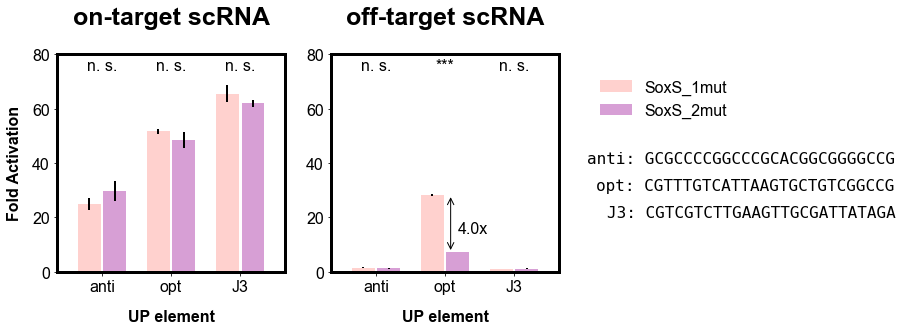

In [243]:
plt.figure(figsize=(9,4))
plt.subplot(121)
x = np.array([0,2.45,4.9])
xticks = [s[:-3] for s in sorted_lbls[[8,12,4]]]

plt.bar(x-0.45,m[[8,12,4]], yerr = s[[8,12,4]], color = '#ffa59e', alpha = 0.5)
plt.bar(x+0.45,m[[10,14,6]], yerr = s[[10,14,6]], color = '#b041ad', alpha = 0.5)

plt.ylabel('Fold Activation', labelpad = ypad)
plt.title('on-target scRNA', pad =xpad*2)
plt.xticks(x,xticks)
plt.xlabel('UP element', labelpad = xpad)
plt.ylim([0,80])
plt.xlim([-1.6,6.5])

put_pval(0, 0, stats.ttest_ind_from_stats(m[4:-4:4][1],s[4:-4:4][1],3,m[6:-4:4][1],s[6:-4:4][1],3, equal_var = 'False')[1], x, [49]*3, dh = 0.3, barh = .0, maxasterix = 3)
put_pval(1, 1, stats.ttest_ind_from_stats(m[4:-4:4][2],s[4:-4:4][2],3,m[6:-4:4][2],s[6:-4:4][2],3, equal_var = 'False')[1], x, [49]*3, dh = 0.3, barh = .0, maxasterix = 3)
put_pval(2, 2, stats.ttest_ind_from_stats(m[4:-4:4][0],s[4:-4:4][0],3,m[6:-4:4][0],s[6:-4:4][0],3, equal_var = 'False')[1], x, [49]*3, dh = 0.3, barh = .0, maxasterix = 3)

plt.subplot(122)
plt.bar(x-0.45,m[[9,13,5]], yerr = s[[9,13,5]], color = '#ffa59e', alpha = 0.5)
plt.bar(x+0.45,m[[11,15,7]], yerr = s[[11,15,7]], color = '#b041ad', alpha = 0.5)
#plt.ylabel('Fold Activation', labelpad = ypad)
plt.title('off-target scRNA', pad = xpad*2)
plt.xticks(x,xticks)
plt.xlabel('UP element', labelpad = xpad)
plt.ylim([0,80])
plt.xlim([-1.6,6.5])

plt.legend(['SoxS_1mut','SoxS_2mut'],frameon=False, bbox_to_anchor=(1.8, .95))
#plt.tight_layout()

put_pval(0, 0, stats.ttest_ind_from_stats(m[5:-4:4][1],s[5:-4:4][1],3,m[7:-4:4][1],s[7:-4:4][1],3, equal_var = 'False')[1], x, [49]*3, dh = 0.3, barh = .0, maxasterix = 3)
put_pval(1, 1, stats.ttest_ind_from_stats(m[5:-4:4][2],s[5:-4:4][2],3,m[7:-4:4][2],s[7:-4:4][2],3, equal_var = 'False')[1], x, [49]*3, dh = 0.3, barh = .0, maxasterix = 3)
put_pval(2, 2, stats.ttest_ind_from_stats(m[5:-4:4][0],s[5:-4:4][0],3,m[7:-4:4][0],s[7:-4:4][0],3, equal_var = 'False')[1], x, [49]*3, dh = 0.3, barh = .0, maxasterix = 3)

plt.annotate("", xy=(2.65, m[5:-4:4][2]), xytext=(2.65, m[7:-4:4][2]),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1))
plt.text(2.6+0.3, m[5:-4:4][2]/2, '{x:.{d}f}x'.format(x=np.round(m[5:-4:4][2]/m[7:-4:4][2]),d=1))

plt.text(7.5, 40, 'anti: GCGCCCCGGCCCGCACGGCGGGGCCG', family = 'monospace')
plt.text(7.8, 30, 'opt: CGTTTGTCATTAAGTGCTGTCGGCCG', family = 'monospace')
plt.text(8.2, 20, 'J3: CGTCGTCTTGAAGTTGCGATTATAGA', family = 'monospace')


In [18]:
sorted_lbls[[5,7]]

array(['J3_1-', 'J3_2-'], dtype='<U7')

In [19]:
m[[5,7]]

array([1.07530461, 1.16128712])

In [118]:
path = 'activatable promoters/ecoli/soxbox/lib/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

plate = pd.read_csv(path+'211029-lib_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP,lbl)/get_data(X,OD,lbl)

In [128]:
b = 54.428
FA = (get_ratio(exps['lib'],'3N_OFF_200')-b) / (get_ratio(exps['lib'],'3N_OFF_0')-b)

aFA = (get_ratio(exps['anti_2-'],'3N_OFF_200')-b) / (get_ratio(exps['anti_2-'],'3N_OFF_0')-b)
oFA = (get_ratio(exps['opt_2-'],'3N_OFF_200')-b) / (get_ratio(exps['opt_2-'],'3N_OFF_0')-b)

([], [])

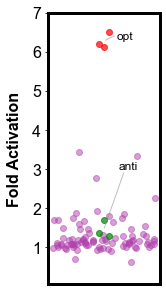

In [305]:
X = (np.random.rand(len(FA))-0.5)

plt.figure(figsize=(2,5))
plt.scatter(X,FA, color = '#b041ad', alpha = 0.5)
plt.scatter([-0.05,0,0.05],oFA, color = 'g', alpha = 0.7)
plt.scatter([-0.05,0,0.05],aFA, color = 'r', alpha = 0.7)
plt.ylabel('Fold Activation', labelpad = ypad)

texts=[]
texts.append(plt.text(0, aFA.mean(), 'opt', ha='center', va='center',size = 12))
texts.append(plt.text(0, oFA.mean(), 'anti', ha='center', va='center',size = 12))
adjust_text(texts, force_points = (30,30), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.5))
plt.ylim([0.05,7])
plt.xticks([])

In [306]:
np.round(np.sum(FA<=(oFA.mean()))/len(FA),2)
np.round(np.sum(FA<=(oFA.mean()+2*oFA.std()))/len(FA),2)

0.91

In [308]:
oFA.mean()

1.447986005072023

In [307]:
oFA.mean()+2*oFA.std()

1.7844945095861469

In [126]:
path = 'activatable promoters/ecoli/UP/reselection/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 52, index_col = (13,0)).loc['GFP+RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

plate = pd.read_csv(path+'211029-plate_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP,lbl)/get_data(X,OD,lbl)

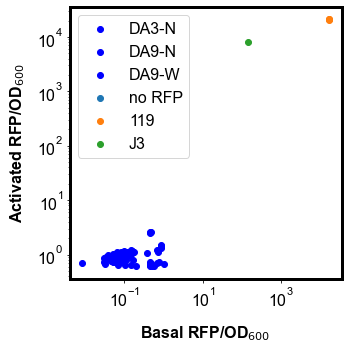

In [131]:
b0 = get_ratio(exps['control'],'3N_ON_0').mean()
b200 = get_ratio(exps['control'],'3N_ON_200').mean()

max0 = get_ratio(exps['control'],'9W_ON_0')
max200 = get_ratio(exps['control'],'9W_ON_200')

J30 = get_ratio(exps['control'],'9N_ON_0').mean()
J3200 = get_ratio(exps['control'],'9N_ON_200').mean()

norm_UP_b = []
norm_UP_a = []
plt.figure(figsize=(5,5))
for l in ['3N_ON_', '9N_ON_', '9W_ON_']:
    b = (get_ratio(exps['lib'],l+'0')-b0)/(J30-b0)
    a = (get_ratio(exps['lib'],l+'200')-b200)/(J3200-b200)
    norm_UP_b.append(b)
    norm_UP_a.append(a)
    plt.scatter(b[(b<1.3) & (a>0.6)],a[(b<1.3) & (a>0.6)], color = 'blue')

plt.scatter(b0-b0,b200-b200)
plt.scatter(max0-b0,max200-b200)
plt.scatter(J30-b0,J3200-b200)

plt.legend(['DA3-N','DA9-N','DA9-W', 'no RFP','119','J3'])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Activated RFP/OD$_{600}$', labelpad = ypad)
plt.xlabel('Basal RFP/OD$_{600}$', labelpad = xpad)
plt.gca().set_aspect(1./plt.gca().get_data_ratio())

In [66]:
selected_UP = {'9W_ON':[('G','12'),('E','12'),('A','4'),('H','11')],'3N_ON':[('C','12')]}
seleceted_UP_MP = {'9W_ON':[('G','12'),('E','12'),('A','4')]}

norm_IS_b = {'UP':[],'MP':[]}
norm_IS_a = {'UP':[],'MP':[]}

for k,v in seleceted_UP_MP.items():
    b = (get_ratio(v,k+'_0')-b0)/(J30-b0)
    a = (get_ratio(v,k+'_200')-b200)/(J3200-b200)
    
    norm_IS_b['UP'].append(b)
    norm_IS_a['UP'].append(a)


57

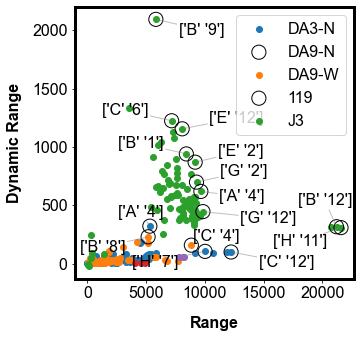

In [101]:
fDR = lambda B,A: (A-b200.mean()) / (B-b0.mean()+b0.std())
fR = lambda B,A: (A-b200.mean()) - (B-b0.mean()+b0.std())
pareto2 = lambda A, B: [~(np.any((A>a) & (B>b))) for a,b in zip(A,B)]

texts = []
best = {}
plt.figure(figsize=(5,5))
for l in ['3N_ON_','9N_ON_','9W_ON_']:
    R = fR(get_ratio(exps['lib'],l+'0'),get_ratio(exps['lib'],l+'200'))
    DR = fDR(get_ratio(exps['lib'],l+'0'),get_ratio(exps['lib'],l+'200'))
    plt.scatter(R, DR)
    best[l[:2]] = pareto2(DR,R)
    plt.scatter(R[best[l[:2]]],DR[best[l[:2]]], color = 'k', alpha = 1, s = 200,facecolors='none')
    for ll, p,k in zip(np.array(exps['lib']),best[l[:2]], range(93)):
        if p:
            texts.append(plt.text(R[k], DR[k], str(ll)))
            #print(l)
            #print(str(ll))
            #print([R[k],DR[k]])
        
plt.scatter(fR(max0,max200), fDR(max0,max200))
plt.scatter(fR(J30,J3200), fDR(J30,J3200))

plt.legend(['DA3-N','DA9-N','DA9-W','119','J3'])
plt.ylabel('Dynamic Range', labelpad = ypad)
plt.xlabel('Range', labelpad = xpad)

#plt.xlim((-50, 25060.76544007391/2))
#plt.ylim((-5, 1985.92886691264357))
adjust_text(texts, force_points = (20,2), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.5))


In [103]:
fR(J30,J3200).mean()

8054.244274960903

In [173]:
l = '9W_ON_'
np.sort(DR(get_ratio(exps['lib'],l+'0'),get_ratio(exps['lib'],l+'200')))

array([-1.28817185e+03, -1.71909606e+01, -6.11482528e+00, -3.62030413e+00,
        5.88029487e+01,  9.24837369e+01,  1.44381583e+02,  2.72807502e+02,
        3.15531285e+02,  3.21658821e+02,  3.23825101e+02,  3.54699538e+02,
        3.83135317e+02,  4.01084348e+02,  4.04748948e+02,  4.10637318e+02,
        4.12041223e+02,  4.13714297e+02,  4.18642391e+02,  4.29172350e+02,
        4.29318959e+02,  4.29684469e+02,  4.35628361e+02,  4.37450964e+02,
        4.39009040e+02,  4.39966517e+02,  4.45318770e+02,  4.48783686e+02,
        4.49412248e+02,  4.55521363e+02,  4.70481690e+02,  4.70636583e+02,
        4.70886785e+02,  4.75775634e+02,  4.80339831e+02,  4.81408673e+02,
        4.98692328e+02,  4.99971440e+02,  5.05438187e+02,  5.17806086e+02,
        5.21913311e+02,  5.27318395e+02,  5.32310307e+02,  5.35473487e+02,
        5.36808989e+02,  5.52270704e+02,  5.64079533e+02,  5.75724100e+02,
        5.77060252e+02,  5.78113534e+02,  6.08816728e+02,  6.12885100e+02,
        6.31090724e+02,  

In [200]:
(get_ratio(exps['lib'],'9W_ON_200')-b200.mean())[17]/(get_ratio(exps['lib'],'9W_ON_0')-b0.mean()+b0.std())[17]

2093.7556647715064

In [179]:
 np.argsort(DR(get_ratio(exps['lib'],'9W_ON_0'),get_ratio(exps['lib'],'9W_ON_200')))

array([22, 68,  4,  5, 33, 72, 29, 78, 91, 66, 20, 69, 36, 40, 55, 41, 64,
       51, 65, 49, 59, 57, 37, 85, 54, 73, 48, 61, 60, 16, 86, 83, 84, 39,
       80, 90, 35, 34, 88, 21,  6, 58,  1, 31, 43, 76, 24, 32, 38, 27, 18,
       87, 28, 30, 10, 74, 44, 13,  2, 45, 42,  0, 75, 62, 89, 67,  8, 47,
       70, 19, 23, 25, 53, 79, 63, 15, 81, 14,  3, 82, 46, 92, 52,  9, 77,
       71, 11,  7, 56, 12, 26, 50, 17], dtype=int64)

In [182]:
DR(get_ratio(exps['lib'],'9W_ON_0'),get_ratio(exps['lib'],'9W_ON_200'))[26]

1683.2979097861753

In [191]:
b200.std()

0.8441378976252867

In [202]:
(get_ratio(exps['lib'],'9W_ON_0')-b0.mean()+b0.std())[17]

2.7845175582162653

In [99]:
fDR = lambda B,A: (A-b200.mean()) / (B-b0.mean()+b0.std())
fR = lambda B,A: (A-b200.mean()) - (B-b0.mean()+b0.std())
pareto2 = lambda A, B: [~(np.any((A>a) & (B>b))) for a,b in zip(A,B)]

texts = []
best = {}
plt.figure(figsize=(5,5))
for l in ['3N_ON_','9N_ON_','9W_ON_']:
    R = fR(get_ratio(exps['lib'],l+'0'),get_ratio(exps['lib'],l+'200'))
    DR = fDR(get_ratio(exps['lib'],l+'0'),get_ratio(exps['lib'],l+'200'))
    plt.scatter(R, DR)
    best[l[:2]] = pareto2(DR,R)
        
plt.scatter(fR(max0,max200), fDR(max0,max200))
plt.scatter(fR(J30,J3200), fDR(J30,J3200))

plt.legend(['DA3-N','DA9-N','DA9-W','119','J3'])
plt.ylabel('Dynamic Range', labelpad = ypad)
plt.xlabel('Range', labelpad = xpad)

#plt.xlim((-50, 25060.76544007391/2))
#plt.ylim((-5, 1985.92886691264357))

KeyError: '3N_ON_0'

<Figure size 500x500 with 0 Axes>

In [6]:
path = 'activatable promoters/ecoli/promoter/pAP8-off/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 45, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 45, index_col = (13,0)).loc['RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

In [7]:
plate = pd.read_csv(path+'211111-plate_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
lib = [(r,c) for r in RFP['210_0'].index for c in RFP['210_0'].columns]

get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP,lbl)/get_data(X,OD,lbl)

In [8]:
J30 = get_ratio(exps['control'],'210_0')
J3200 = get_ratio(exps['control'],'210_200')

max0 = get_ratio(exps['control'],'212_0')
max200 = get_ratio(exps['control'],'212_200')

b0 = get_ratio(exps['control'],'211_0')
b200 = get_ratio(exps['control'],'211_200')

In [9]:
libraries = ['210','211','212','213','214']
wells = [exps['lib'],exps['lib'],exps['lib'],lib,lib]
titles = ['DA9-W_G12','DA9-W_E12','DA9-W_A4','DA9-W_H11','DA3-N_C12']


In [10]:
DR = lambda B,A: (A-b200.mean()) / (B-b0.mean())
R = lambda B,A: (A-b200.mean()) - (B-b0.mean())


(0.05, 7.0)

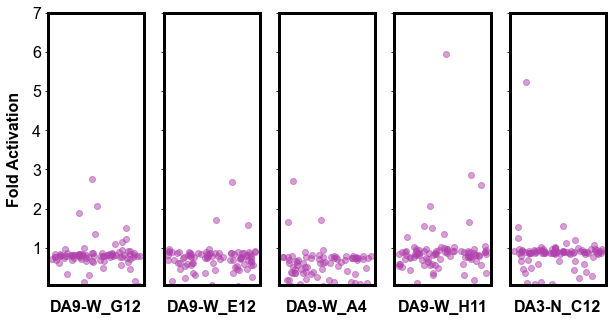

In [12]:
f,ax = plt.subplots(1,5, sharey = True,figsize=(10,5))

for i,l in enumerate(libraries):
    X = (np.random.rand(len(wells[i]))-0.5)

    ax[i].scatter(X,DR(get_ratio(wells[i],l+'_200'),get_ratio(wells[i],l+'_0')), color = '#b041ad', alpha = 0.5)
    ax[i].set_xticks([])
    ax[i].set_xlabel(titles[i], labelpad = xpad)

ax[0].set_ylabel('Fold Activation', labelpad = ypad)

plt.ylim([0.05,7])



(-1.5, 45.0)

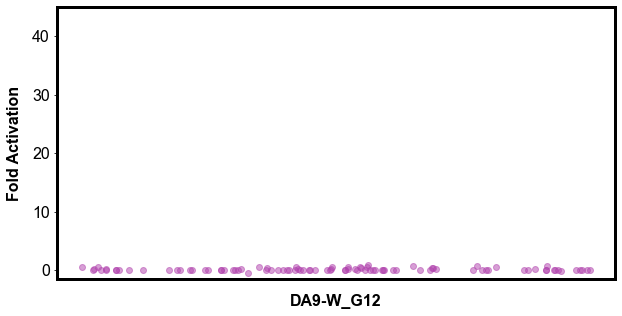

In [99]:
f,ax = plt.subplots(1,1, sharey = True,figsize=(10,5))

for i,l in enumerate(['J3pAP8']):
    X = (np.random.rand(len(wells[i]))-0.5)

    ax.scatter(X,DR(get_ratio(wells[i],l+'_200'),get_ratio(wells[i],l+'_0')), color = '#b041ad', alpha = 0.5)
    ax.set_xticks([])
    ax.set_xlabel(titles[i], labelpad = xpad)

ax.set_ylabel('Fold Activation', labelpad = ypad)

plt.ylim([-1.5,45])



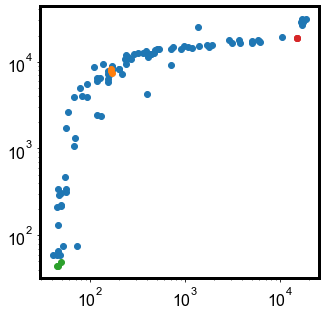

In [116]:
plt.figure(figsize = (5,5))
plt.scatter(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200'))
plt.scatter(get_ratio(exps['control'],'210_0'),get_ratio(exps['control'],'210_200'))
plt.scatter(get_ratio(exps['control'],'211_0'),get_ratio(exps['control'],'211_200'))
plt.scatter(get_ratio(exps['control'],'212_0'),get_ratio(exps['control'],'212_200'))

plt.xscale('log')
plt.yscale('log')

(-1.0, 300.0)

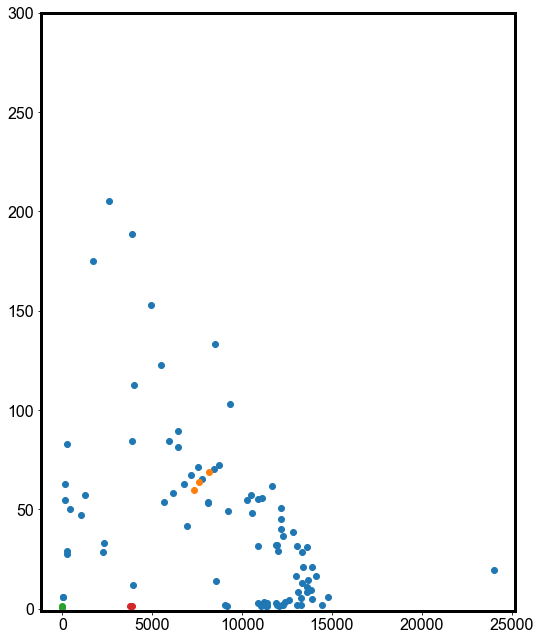

In [115]:
plt.scatter(R(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200')),DR(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200')))
plt.scatter(R(get_ratio(exps['control'],'210_0'),get_ratio(exps['control'],'210_200')),DR(get_ratio(exps['control'],'210_0'),get_ratio(exps['control'],'210_200')))
plt.scatter(R(get_ratio(exps['control'],'211_0'),get_ratio(exps['control'],'211_200')),DR(get_ratio(exps['control'],'211_0'),get_ratio(exps['control'],'211_200')))
plt.scatter(R(get_ratio(exps['control'],'212_0'),get_ratio(exps['control'],'212_200')),DR(get_ratio(exps['control'],'212_0'),get_ratio(exps['control'],'212_200')))

plt.ylim([-1,300])

# pAP8

In [3]:
path = 'activatable promoters/ecoli/promoter/pAP8-on/'
(_,_,filenames) = list(walk(path))[0]

read_OD = lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 45, index_col = (13,0)).loc['600'].set_index('Unnamed: 0')
OD = {f[:-4] : read_OD(f) for f in filenames if f[-3:] == 'txt'}

read_RFP= lambda f: pd.read_csv(path+f, delimiter  = '\t', skiprows = 45, index_col = (13,0)).loc['RFP:540/35,600/40'].set_index('Unnamed: 0').set_index(OD[f[:-4]].index)
RFP = {f[:-4] : read_RFP(f) for f in filenames if f[-3:] == 'txt'}

plate = pd.read_csv(path+'211112-plate_LAYOUT.csv', index_col = 0, dtype = str) # reads plate layout

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append((i[0], i[1]))
            
lib = [(r,c) for r in RFP['210_200'].index for c in RFP['210_200'].columns]

get_data = lambda X, df, lbl: np.array([df[lbl].loc[x] for x in X])
get_ratio = lambda X, lbl: get_data(X,RFP,lbl)/get_data(X,OD,lbl)

In [4]:
J30 = get_ratio(exps['control'],'210_0b')
J3200 = get_ratio(exps['control'],'210_200')

max0 = get_ratio(exps['control'],'212_0')
max200 = get_ratio(exps['control'],'212_200')

b0 = get_ratio(exps['control'],'211_0')
b200 = get_ratio(exps['control'],'211_200')

DR = lambda B,A: (A-b200.mean()) / (B-b200.mean()+b200.std())
R = lambda B,A: (A-b200.mean()) - (B-b200.mean())
B = lambda B,A: (B-b200.mean())

In [5]:
selected_MP = {'211':[('B','1'),('C','3')],'212':[('A','11'),('G','10')]}
selected_MP_TXTL = {'211':[('B','1'),('C','3')],'212':[('A','11')]}

In [140]:
for k,v in selected_MP_TXTL.items():
    b = (get_ratio(v,k+'_0') - b200.mean()) / (J30.mean()-b200.mean())
    act = (get_ratio(v,k+'_200') - b200.mean()) / (J3200.mean()-b200.mean())
    norm_IS_b['MP'].append(b)
    norm_IS_a['MP'].append(act)


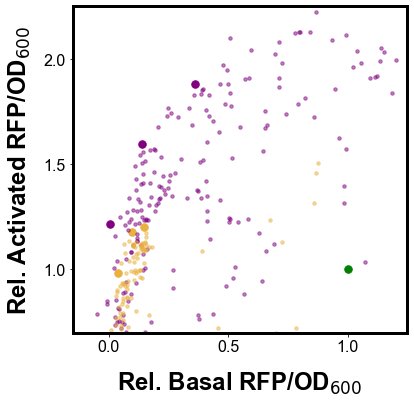

In [175]:
plt.figure(figsize=(6,6))
plt.scatter(norm_IS_b['UP'],norm_IS_a['UP'], s = 56, color = '#eab141')
plt.scatter(norm_IS_b['MP'][0],norm_IS_a['MP'][0], color = '#800080', s = 56)
plt.scatter(norm_IS_b['MP'][1],norm_IS_a['MP'][1], color = '#800080',s = 56)
plt.scatter(1,1, color = 'g',s = 56)
plt.xlabel('Rel. Basal RFP/OD$_{600}$', labelpad = xpad, size = 24, weight = 'bold')
plt.ylabel('Rel. Activated RFP/OD$_{600}$', labelpad = ypad, size = 24, weight = 'bold')
plt.xlim([-0.15,1.25])
plt.ylim([0.7,2.25])

for l in ['214','213','212','211']:
    b = (get_ratio(lib,l+'_0') - b200.mean()) / (J30.mean()-b200.mean())
    act = (get_ratio(lib,l+'_200') - b200.mean()) / (J3200.mean()-b200.mean())
    
    plt.scatter(b[(b<1.3) & (act>0.6)],act[(b<1.3) & (act>0.6)], color = '#800080', s = 12, alpha = 0.5)

for b,a in zip(norm_UP_b, norm_UP_a):
    plt.scatter(b[(b<1.3) & (a>0.6)],a[(b<1.3) & (a>0.6)], color = '#eab141', s = 12, alpha = 0.5)

plt.gca().yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10, symmetric = True))
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, symmetric = True))

plt.savefig('figures/paretos.svg')

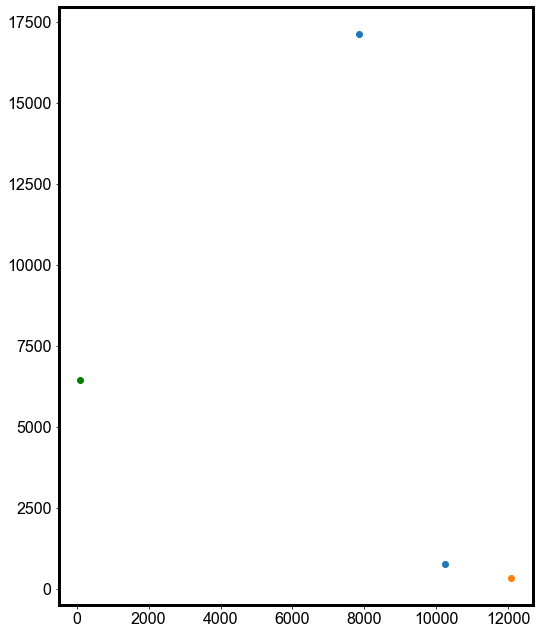

In [16]:
for k,v in selected_MP_TXTL.items():
    b = (get_ratio(v,k+'_0') - b200.mean()) 
    act = (get_ratio(v,k+'_200') - b200.mean())
    plt.plot(act-b, act/b,'o')
    
plt.plot((J30.mean()-b200.mean()),(J3200.mean()-b200.mean()),'go')




214
[]
213
[]
212
[['A' '1']
 ['B' '12']]
211
[['B' '1']
 ['C' '6']
 ['E' '2']
 ['H' '5']]
210
[['G' '8']
 ['H' '6']]


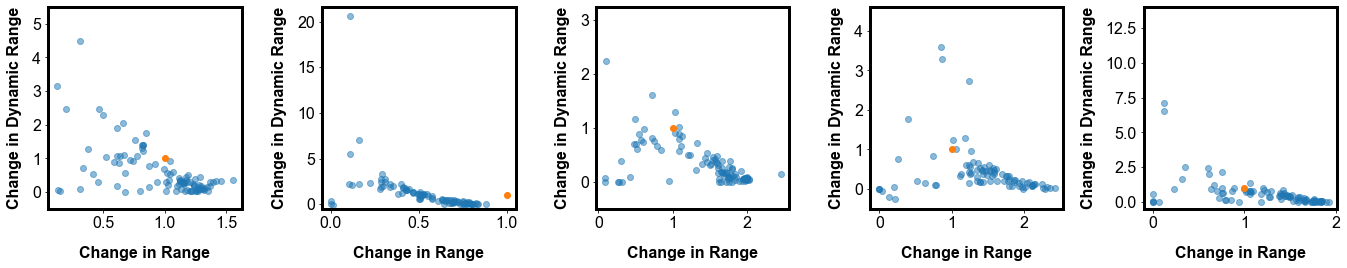

In [26]:
f,ax=plt.subplots(1,5,figsize = (19,4))
for a,l in zip(ax,['214','213','212','211']):
    print(l)
    rrr = R(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200'))/R(J30,J3200).mean()/OG[l][0]
    rrrd = DR(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200'))/DR(J30,J3200).mean()/OG[l][1]
    a.scatter(rrr,rrrd, alpha = 0.5, label = l)
    print(np.array(lib)[np.logical_and(rrr>1 , rrrd>1)])
    a.set_ylim([-.5,np.nanmax(rrrd)+1])
    a.scatter(1,1)
    a.set_ylabel('Change in Dynamic Range', labelpad = ypad)
    a.set_xlabel('Change in Range', labelpad = xpad)
    
l = '210'
print(l)
rrr = R(get_ratio(lib,l+'_0b'),get_ratio(lib,l+'_200'))/R(J30,J3200).mean()/OG[l][0]
rrrd = DR(get_ratio(lib,l+'_0b'),get_ratio(lib,l+'_200'))/DR(J30,J3200).mean()/OG[l][1]
ax[-1].scatter(rrr,rrrd, alpha = 0.5, label = l)
print(np.array(lib)[np.logical_and(rrr>1 , rrrd>1)])
ax[-1].scatter(1,1)
ax[-1].set_ylim([-.5,14])
ax[-1].set_ylabel('Change in Dynamic Range', labelpad = ypad)
ax[-1].set_xlabel('Change in Range', labelpad = xpad)
f.tight_layout()

In [17]:
l = '210'
row = 'H'
col = '6'
print(R(get_ratio([(row,col)],l+'_0b'),get_ratio([(row,col)],l+'_200')))
print(DR(get_ratio([(row,col)],l+'_0b'),get_ratio([(row,col)],l+'_200')))

[8226.11534734]
[688.7470397]


In [18]:
get_ratio([(row,col)],l+'_200')

array([8286.13569322])

In [19]:
OG = {'210':(1.220762329,7.698150956), 
'211':(1.001556412,19.95853382),
'212':(1.199042352,10.68983224),
'213':(2.679287996,5.326432957),
'214':(1.518086562,1.71587665)}
    

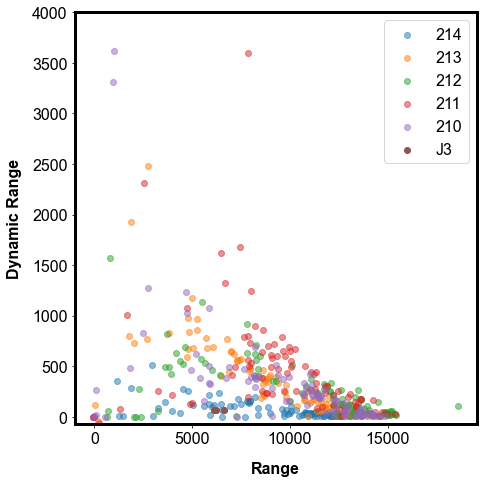

In [9]:
f,a=plt.subplots(1,1,figsize = (7,7))
for l in ['214','213','212','211']:
    rrr = R(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200'))
    rrrd = DR(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200'))
    a.scatter(rrr,rrrd, alpha = 0.5, label = l)
    a.set_ylabel('Dynamic Range', labelpad = ypad)
    a.set_xlabel('Range', labelpad = xpad)
    
l = '210'
a.scatter(R(get_ratio(lib,l+'_0b'),get_ratio(lib,l+'_200')),DR(get_ratio(lib,l+'_0b'),get_ratio(lib,l+'_200')), alpha = 0.5, label = l)
a.scatter(R(J30,J3200),DR(J30,J3200), alpha = 1, label = 'J3')

a.set_ylim(-70,4000)
a.legend()
f.tight_layout()

17

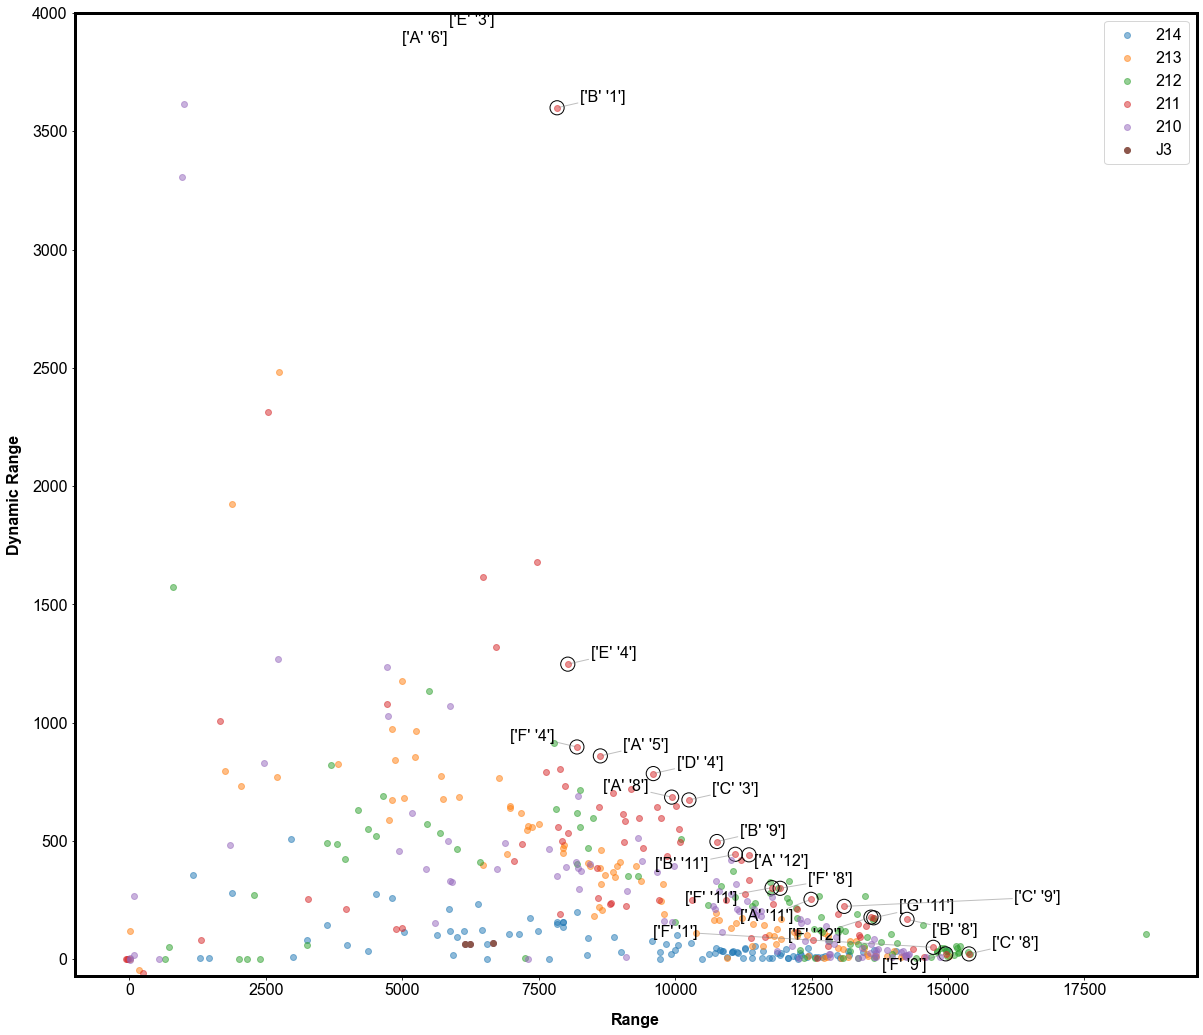

In [21]:
pareto2 = lambda A, B: [~(np.any((A>a) & (B>b))) for a,b in zip(A,B)]
texts = []
f,a=plt.subplots(1,1,figsize = (17,17))
for l in ['214','213','212','211']:
    rrr = R(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200'))
    rrrd = DR(get_ratio(lib,l+'_0'),get_ratio(lib,l+'_200'))
    a.scatter(rrr,rrrd, alpha = 0.5, label = l)
    a.set_ylabel('Dynamic Range', labelpad = ypad)
    a.set_xlabel('Range', labelpad = xpad)
    if l == '211':
        best = pareto2(rrrd,rrr)
        plt.scatter(rrr[best],rrrd[best], color = 'k', alpha = 1, s = 200,facecolors='none')
        for ll, p,k in zip(np.array(exps['lib']),best, range(93)):
            if p:
                texts.append(plt.text(rrr[k], rrrd[k], str(ll)))
                #print(l)
                #print(str(ll))
                #print([R[k],DR[k]])
    
l = '210'
a.scatter(R(get_ratio(lib,l+'_0b'),get_ratio(lib,l+'_200')),DR(get_ratio(lib,l+'_0b'),get_ratio(lib,l+'_200')), alpha = 0.5, label = l)
a.scatter(R(J30,J3200),DR(J30,J3200), alpha = 1, label = 'J3')

a.set_ylim(-70,4000)
a.legend()
f.tight_layout()
adjust_text(texts, force_points = (20,2), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.5))


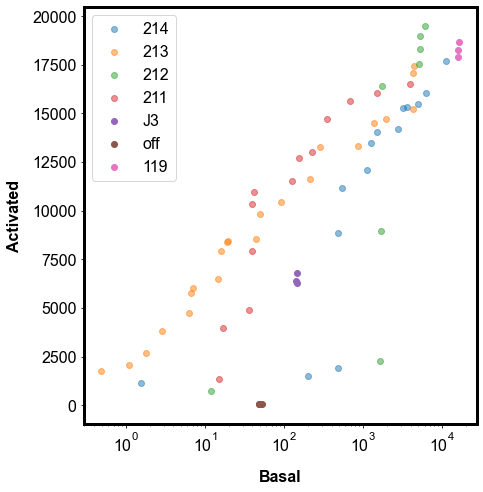

In [25]:
f,a=plt.subplots(1,1,figsize = (7,7))
for l in ['214','213','212','211']:
    rrr = get_ratio(exps['lib'],l+'_0')-b200.mean()
    rrrd = get_ratio(exps['lib'],l+'_200')-b200.mean()
    best = pareto(rrr,rrrd)
    a.scatter(rrr[best],rrrd[best], alpha = 0.5, label = l)
    a.set_ylabel('Activated', labelpad = ypad)
    a.set_xlabel('Basal', labelpad = xpad)
    
l = '210'
#a.scatter(get_ratio(exps['lib'],l+'_0b'),get_ratio(exps['lib'],l+'_200'), alpha = 0.5, label = l)
a.scatter(J30,J3200, alpha = 1, label = 'J3')
a.scatter(b200,b200, alpha = 1, label = 'off')
a.scatter(max0,max200, alpha = 1, label = '119')

#a.set_ylim(-70,4000)
a.legend()
f.tight_layout()
a.set_xscale('log')
a.set_yscale('linear')

In [32]:
OD['214_0'].loc['B'] = np.nan

In [172]:
basal = np.random.uniform(1, max200.mean(), 700000)
activated = basal*np.random.uniform(1, max200.mean(), 700000)
rR = activated - basal
rDR = activated/basal

(0.0, 500.0)

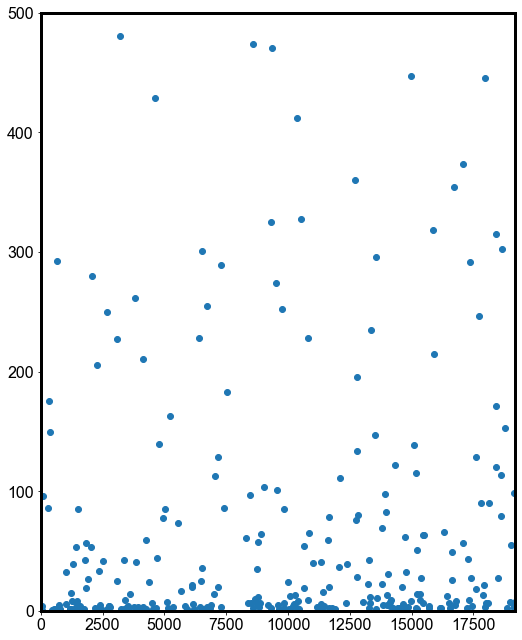

In [174]:
plt.scatter(rR,rDR)
plt.xlim([0, max200.mean()*1.05])
plt.ylim([0, 500])
